# Base de données de l'étude 

## Phase 1: Récupération et Visualisation des Régions de France

Ce code télécharge les données géographiques des régions françaises, calcule leurs centroïdes et affiche une carte. Les centroïdes sont extraits pour chaque région et stockés sous forme de triplets (region, longitude, latitude) pour une utilisation ultérieure.

In [52]:
#Installation des bibliothèques nécessaires pour la récupération et la représentation des données géographiques
!pip install contextily && geopandas &&  topojson && py7zr && openpyxl && tqdm && s3fs && pandas && fiona && shapely && pyproj && rtree
!pip install PyYAML xlrd && git+https://github.com/inseefrlab/cartiflette && git+https://github.com/inseeFrLab/cartiflette.git && openmeteo-requests
!pip install requests-cache retry-requests 
!pip install geopandas
!pip install cartiflette

'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [53]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [54]:
# Récupératoin des données 

from cartiflette import carti_download

france = carti_download(
    values=["France"],
    crs=4326,
    borders="REGION",
    vectorfile_format="geojson",
    simplification=50,
    filter_by="FRANCE_ENTIERE",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022,
)


In [55]:
france.head()

INSEE_REG    PAYS        LIBELLE_REGION  POPULATION  \
0          1  France            Guadeloupe      384239   
1          3  France                Guyane      281678   
2          2  France            Martinique      364508   
3          6  France               Mayotte      256518   
4         84  France  Auvergne-Rhône-Alpes     8042936   

                             SOURCE  \
0  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
1  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
2  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
3  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
4  IGN:EXPRESS-COG-CARTO-TERRITOIRE   

                                            geometry  
0  MULTIPOLYGON (((-61.62648 16.27275, -61.62658 ...  
1  MULTIPOLYGON (((-51.6408 4.21282, -51.64144 4....  
2  MULTIPOLYGON (((-60.93246 14.7306, -60.9326 14...  
3  MULTIPOLYGON (((45.08357 -12.96139, 45.08547 -...  
4  POLYGON ((6.06386 46.41639, 6.06267 46.4168, 6...

In [56]:
print(france.crs)

EPSG:4326


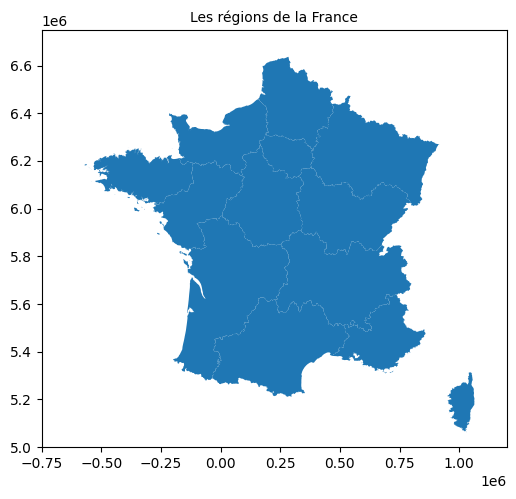

In [57]:
#REPRESENTATION 

if france.crs.to_string() != "EPSG:3857":
    france = france.to_crs(epsg=3857)
#Les  limites de la carte
xmin, xmax = -0.75e6, 1.2e6  # Convertir les limites en mètres (EPSG:3857)
ymin, ymax = 5e6, 6.75e6

#Ploting
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
france.plot(ax=ax)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
plt.title("Les régions de la France", fontsize=10)
plt.show()


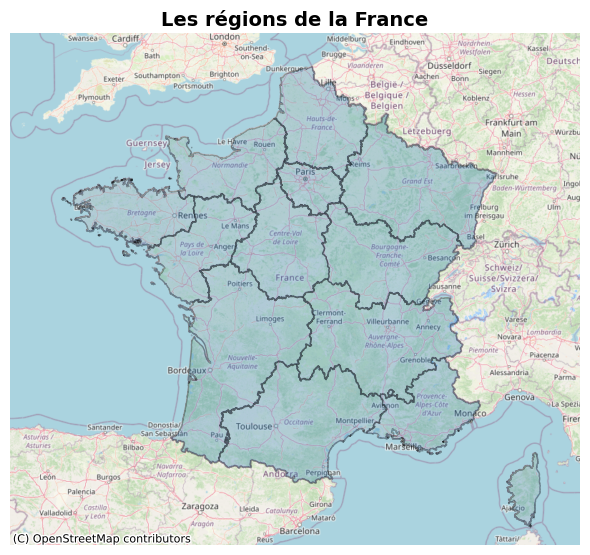

In [58]:
# Ajout d'un fond de carte pour un meilleur contexte géographique
fig, ax = plt.subplots(1, 1, figsize=(6, 6)) 
france.plot(ax=ax, edgecolor='black', linewidth=1, alpha=0.3)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# 
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=france.crs)
#
plt.title("Les régions de la France", fontsize=14, fontweight='bold')
ax.axis('off') 

plt.tight_layout() 
plt.show()


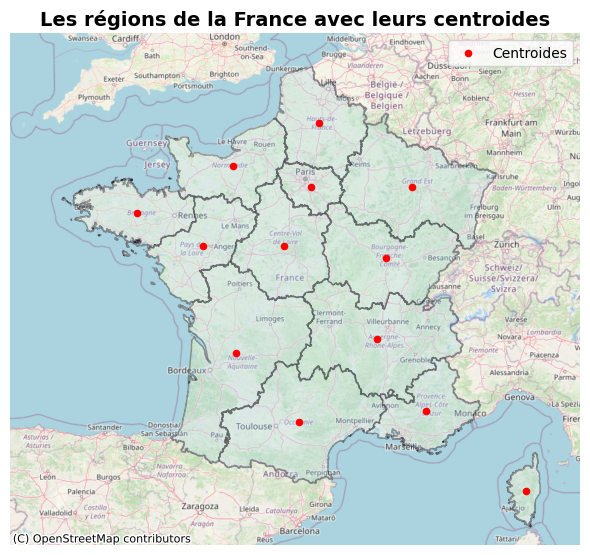

In [59]:
#Représentation des centroides 
france['centroid'] = france.geometry.centroid
france['longitude'] = france.centroid.x
france['latitude'] = france.centroid.y
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
france.plot(ax=ax, edgecolor='black', linewidth=1, alpha=0.3, color='lightblue')
ax.scatter(france['longitude'], france['latitude'], color='red', s=20, label='Centroides')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=france.crs)
plt.title("Les régions de la France avec leurs centroides", fontsize=14, fontweight='bold')
ax.axis('off')
ax.legend()
plt.tight_layout()
plt.show()

In [60]:
# Calcul des longitudes et latitudes 
france = france.to_crs(epsg=4326)
france['longitude'] = france.geometry.centroid.x
france['latitude'] = france.geometry.centroid.y
print(france[['LIBELLE_REGION', 'longitude', 'latitude']])


                LIBELLE_REGION  longitude   latitude
0                   Guadeloupe -61.539833  16.197646
1                       Guyane -53.239940   3.915167
2                   Martinique -61.019379  14.654871
3                      Mayotte  45.147435 -12.820617
4         Auvergne-Rhône-Alpes   4.536119  45.514642
5                    Occitanie   2.143923  43.702500
6                     Bretagne  -2.841463  48.177549
7           Nouvelle-Aquitaine   0.212719  45.206040
8                    Normandie   0.110932  49.120067
9   Provence-Alpes-Côte d'Azur   6.061005  43.958789
10            Pays de la Loire  -0.816786  47.478104
11                   Grand Est   5.613112  48.688977
12     Bourgogne-Franche-Comté   4.806857  47.234282
13               Île-de-France   2.503401  48.709316
14         Centre-Val de Loire   1.684391  47.484775
15             Hauts-de-France   2.771303  49.969594
16                       Corse   9.106152  42.151511
17                  La Réunion  55.532509 -21.

C:\Users\steph\AppData\Local\Temp\ipykernel_24188\2487130668.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  france['longitude'] = france.geometry.centroid.x
C:\Users\steph\AppData\Local\Temp\ipykernel_24188\2487130668.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  france['latitude'] = france.geometry.centroid.y


In [61]:
france.head()

INSEE_REG    PAYS        LIBELLE_REGION  POPULATION  \
0          1  France            Guadeloupe      384239   
1          3  France                Guyane      281678   
2          2  France            Martinique      364508   
3          6  France               Mayotte      256518   
4         84  France  Auvergne-Rhône-Alpes     8042936   

                             SOURCE  \
0  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
1  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
2  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
3  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
4  IGN:EXPRESS-COG-CARTO-TERRITOIRE   

                                            geometry  \
0  MULTIPOLYGON (((-61.62648 16.27275, -61.62658 ...   
1  MULTIPOLYGON (((-51.6408 4.21282, -51.64144 4....   
2  MULTIPOLYGON (((-60.93246 14.7306, -60.9326 14...   
3  MULTIPOLYGON (((45.08357 -12.96139, 45.08547 -...   
4  POLYGON ((6.06386 46.41639, 6.06267 46.4168, 6...   

                           centroid  longitude   latitude  
0  POINT (-6850582.542 1827642.261) -61.539833  16.197646  
1    POINT (-5926644.81 436331.726) -53.239940   3.915167  
2  POINT (-6792650.367 1649468.223) -61.019379  14.654871  
3  POINT (5025789.843 -1439250.269)  45.147435 -12.820617  
4     POINT (504837.95 5704315.458)   4.536119  45.514642

In [62]:
# Création de la liste de triplets (région, longitude, latitude)
region_centroides = []
for index, row in france.iterrows():
    region = row['LIBELLE_REGION']  # Nom de la région
    longitude = row['longitude']  # Longitude du centroïde
    latitude = row['latitude']    # Latitude du centroïde
    region_centroides.append((region, longitude, latitude)) # Ajout du triplet à la liste
region_centroides

[('Guadeloupe', -61.53983304107784, 16.197645826552904),
 ('Guyane', -53.23993971851178, 3.915166862499844),
 ('Martinique', -61.019378740773654, 14.654870858984358),
 ('Mayotte', 45.14743542382146, -12.820616875536656),
 ('Auvergne-Rhône-Alpes', 4.536118586333609, 45.51464202656834),
 ('Occitanie', 2.143922833937654, 43.70250024549978),
 ('Bretagne', -2.841462676465886, 48.17754922086023),
 ('Nouvelle-Aquitaine', 0.21271860548694332, 45.2060395396088),
 ('Normandie', 0.11093239896467046, 49.12006667987373),
 ("Provence-Alpes-Côte d'Azur", 6.061004522552231, 43.95878857291765),
 ('Pays de la Loire', -0.81678598261894, 47.47810354487287),
 ('Grand Est', 5.613112231600144, 48.68897740160863),
 ('Bourgogne-Franche-Comté', 4.806856915301157, 47.2342819451994),
 ('Île-de-France', 2.503401392552759, 48.70931550109074),
 ('Centre-Val de Loire', 1.684391322381998, 47.48477508284454),
 ('Hauts-de-France', 2.7713028658475474, 49.969593961262426),
 ('Corse', 9.106151755156151, 42.15151137562012),

##  Phase 2: Collecte des Données de Qualité de l'Air
Ce script Python permet de collecter des données horaires de qualité de l'air via l'API Open-Meteo pour plusieurs régions géographiques. Il utilise une session avec cache et des mécanismes de répétition pour garantir la fiabilité des requêtes. Les données récupérées (PM10, PM2.5, CO, CO2, NO2, SO2, Ozone) sont organisées dans des DataFrames pandas, puis combinées en un seul tableau pour faciliter l'analyse. Une colonne supplémentaire est ajoutée pour extraire les dates sans les heures.

Une fois les données consolidées, elles sont agrégées par jour et par région en calculant la moyenne des valeurs horaires pour chaque polluant. Cette étape permet de simplifier les données tout en conservant une vue quotidienne des concentrations moyennes par région.



In [63]:
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry
from openmeteo_requests import Client


# Création d'une session avec cache
cache_session = requests_cache.CachedSession('.cache', expire_after=3600)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = Client(session=retry_session)

# Création d'un dictionnaire pour stocker les DataFrames
region_dataframes = {}

# Boucle pour récupérer les données pour chaque région
for region, longitude, latitude in region_centroides:
    try:
        url = "https://air-quality-api.open-meteo.com/v1/air-quality"
        params = {
            "latitude": latitude,
            "longitude": longitude,
            "current": ["european_aqi", "us_aqi"],
            "hourly": ["pm10", "pm2_5", "carbon_monoxide", "carbon_dioxide", "nitrogen_dioxide", "sulphur_dioxide", "ozone"],
            "start_date": "2023-01-01",
            "end_date": "2024-11-30"
        }

        responses = openmeteo.weather_api(url, params=params)
        response = responses[0]  # Première réponse, si plusieurs localisations

        # Récupération des données horaires
        hourly = response.Hourly()
        hourly_data = {
            "date": pd.date_range(
                start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
                end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
                freq=pd.Timedelta(seconds=hourly.Interval()),
                inclusive="left"
            ),
            "region": [region] * len(pd.date_range(
                start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
                end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
                freq=pd.Timedelta(seconds=hourly.Interval()),
                inclusive="left"
            )),
            "pm10": hourly.Variables(0).ValuesAsNumpy(),
            "pm2_5": hourly.Variables(1).ValuesAsNumpy(),
            "carbon_monoxide": hourly.Variables(2).ValuesAsNumpy(),
            "carbon_dioxide": hourly.Variables(3).ValuesAsNumpy(),
            "nitrogen_dioxide": hourly.Variables(4).ValuesAsNumpy(),
            "sulphur_dioxide": hourly.Variables(5).ValuesAsNumpy(),
            "ozone": hourly.Variables(6).ValuesAsNumpy()
        }

        # Stockage du DataFrame dans le dictionnaire
        region_dataframes[region] = pd.DataFrame(data=hourly_data)

    except Exception as e:
        print(f"Erreur lors de la récupération des données pour {region}: {e}")

# Concaténation tous les DataFrames
combined_dataframe_air = pd.concat(region_dataframes.values(), ignore_index=True)
combined_dataframe_air['date'] = pd.to_datetime(combined_dataframe_air['date'])
# Création d'une nouvelle colonne 'day' contenant uniquement la date (sans l'heure)
#combined_dataframe_air['day'] = combined_dataframe_air['date'].dt.date
combined_dataframe_air.insert(1,"day",combined_dataframe_air["date"].dt.date)



In [64]:
combined_dataframe_air

date         day      region       pm10  pm2_5  \
0      2023-01-01 00:00:00+00:00  2023-01-01  Guadeloupe  20.500000   11.3   
1      2023-01-01 01:00:00+00:00  2023-01-01  Guadeloupe  21.700001   11.9   
2      2023-01-01 02:00:00+00:00  2023-01-01  Guadeloupe  21.799999   12.0   
3      2023-01-01 03:00:00+00:00  2023-01-01  Guadeloupe  20.700001   11.4   
4      2023-01-01 04:00:00+00:00  2023-01-01  Guadeloupe  19.400000   10.7   
...                          ...         ...         ...        ...    ...   
302395 2024-11-30 19:00:00+00:00  2024-11-30  La Réunion  10.000000    7.1   
302396 2024-11-30 20:00:00+00:00  2024-11-30  La Réunion   9.800000    7.1   
302397 2024-11-30 21:00:00+00:00  2024-11-30  La Réunion   9.700000    7.0   
302398 2024-11-30 22:00:00+00:00  2024-11-30  La Réunion   9.500000    6.9   
302399 2024-11-30 23:00:00+00:00  2024-11-30  La Réunion   9.500000    7.0   

        carbon_monoxide  carbon_dioxide  nitrogen_dioxide  sulphur_dioxide  \
0                  89.0             NaN              3.70             0.30   
1                  89.0             NaN              3.45             0.30   
2                  88.0             NaN              3.15             0.25   
3                  88.0             NaN              2.60             0.25   
4                  88.0             NaN              2.10             0.25   
...                 ...             ...               ...              ...   
302395            100.0           459.0              3.60             2.50   
302396             95.0           455.0              4.20             2.30   
302397             91.0           453.0              4.50             2.20   
302398             90.0           455.0              4.40             2.10   
302399             89.0           459.0              4.10             2.10   

        ozone  
0        62.0  
1        62.0  
2        63.0  
3        64.0  
4        64.0  
...       ...  
302395   56.0  
302396   52.0  
302397   49.0  
302398   47.0  
302399   46.0  

[302400 rows x 10 columns]

In [65]:
# Création d'une session avec cache
cache_session = requests_cache.CachedSession('.cache', expire_after=3600)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = Client(session=retry_session)

# Création d'un dictionnaire pour stocker les DataFrames
region_dataframes = {}

# Boucle pour récupérer les données pour chaque région
for region, longitude, latitude in region_centroides:
    try:
        url = "https://archive-api.open-meteo.com/v1/archive"
        params = {
            "latitude": latitude,
            "longitude": longitude,["temperature_2m", "relative_humidity_2m", "precipitation", "surface_pressure", "wind_speed_10m", "soil_temperature_0_to_7cm", "soil_moisture_0_to_7cm"]
            "hourly": ,
            "start_date": "2023-01-01",
            "end_date": "2024-11-30"
        }

        responses = openmeteo.weather_api(url, params=params)
        response = responses[0]  # Première réponse, si plusieurs localisations

        # Récupération des données horaires
        hourly = response.Hourly()
        hourly_data = {
            "date": pd.date_range(
                start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
                end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
                freq=pd.Timedelta(seconds=hourly.Interval()),
                inclusive="left"
            ),
            "region": [region] * len(pd.date_range(
                start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
                end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
                freq=pd.Timedelta(seconds=hourly.Interval()),
                inclusive="left"
            )),
            "temperature_2m": hourly.Variables(0).ValuesAsNumpy(),
            "relative_humidity_2m": hourly.Variables(1).ValuesAsNumpy(),
            "precipitation": hourly.Variables(2).ValuesAsNumpy(),
            "surface_pressure": hourly.Variables(3).ValuesAsNumpy(),
            "wind_speed_10m": hourly.Variables(4).ValuesAsNumpy(),
            "soil_temperature_0_to_7cm": hourly.Variables(5).ValuesAsNumpy(),
            "soil_moisture_0_to_7cm": hourly.Variables(6).ValuesAsNumpy(),
            "longitude" : longitude,
            "latitude" : latitude
        }

        # Stockage du DataFrame dans le dictionnaire
        region_dataframes[region] = pd.DataFrame(data=hourly_data)

    except Exception as e:
        print(f"Erreur lors de la récupération des données pour {region}: {e}")
        
    # Concaténation tous les DataFrames
combined_dataframe_climat = pd.concat(region_dataframes.values(), ignore_index=True)
combined_dataframe_climat = combined_dataframe_climat.drop(columns=["region","date"])

In [66]:
df=pd.concat([combined_dataframe_air,combined_dataframe_climat],axis=1)
df

date         day      region       pm10  pm2_5  \
0      2023-01-01 00:00:00+00:00  2023-01-01  Guadeloupe  20.500000   11.3   
1      2023-01-01 01:00:00+00:00  2023-01-01  Guadeloupe  21.700001   11.9   
2      2023-01-01 02:00:00+00:00  2023-01-01  Guadeloupe  21.799999   12.0   
3      2023-01-01 03:00:00+00:00  2023-01-01  Guadeloupe  20.700001   11.4   
4      2023-01-01 04:00:00+00:00  2023-01-01  Guadeloupe  19.400000   10.7   
...                          ...         ...         ...        ...    ...   
302395 2024-11-30 19:00:00+00:00  2024-11-30  La Réunion  10.000000    7.1   
302396 2024-11-30 20:00:00+00:00  2024-11-30  La Réunion   9.800000    7.1   
302397 2024-11-30 21:00:00+00:00  2024-11-30  La Réunion   9.700000    7.0   
302398 2024-11-30 22:00:00+00:00  2024-11-30  La Réunion   9.500000    6.9   
302399 2024-11-30 23:00:00+00:00  2024-11-30  La Réunion   9.500000    7.0   

        carbon_monoxide  carbon_dioxide  nitrogen_dioxide  sulphur_dioxide  \
0                  89.0             NaN              3.70             0.30   
1                  89.0             NaN              3.45             0.30   
2                  88.0             NaN              3.15             0.25   
3                  88.0             NaN              2.60             0.25   
4                  88.0             NaN              2.10             0.25   
...                 ...             ...               ...              ...   
302395            100.0           459.0              3.60             2.50   
302396             95.0           455.0              4.20             2.30   
302397             91.0           453.0              4.50             2.20   
302398             90.0           455.0              4.40             2.10   
302399             89.0           459.0              4.10             2.10   

        ozone  temperature_2m  relative_humidity_2m  precipitation  \
0        62.0       23.770000             84.863304            0.0   
1        62.0       23.719999             85.643173            0.0   
2        63.0       23.520000             86.947586            0.0   
3        64.0       23.270000             88.269188            0.0   
4        64.0       22.469999             94.082932            0.2   
...       ...             ...                   ...            ...   
302395   56.0       10.291500             93.833534            0.0   
302396   52.0        9.891500             93.814590            0.0   
302397   49.0        9.391500             97.342743            0.0   
302398   47.0        8.891500             99.663048            0.0   
302399   46.0        9.091500             99.663582            0.0   

        surface_pressure  wind_speed_10m  soil_temperature_0_to_7cm  \
0            1017.400024        9.422101                  24.020000   
1            1017.599976        9.885262                  23.670000   
2            1017.700012        9.720000                  23.420000   
3            1017.400024        7.559999                  23.219999   
4            1017.299988        8.825508                  23.020000   
...                  ...             ...                        ...   
302395        824.523071        3.617955                  12.941500   
302396        823.957458        3.847960                  12.441500   
302397        823.007019        3.065289                  11.991500   
302398        822.137085        2.979530                  11.591500   
302399        821.774109        3.710795                  11.341500   

        soil_moisture_0_to_7cm  longitude   latitude  
0                        0.501 -61.539833  16.197646  
1                        0.499 -61.539833  16.197646  
2                        0.498 -61.539833  16.197646  
3                        0.497 -61.539833  16.197646  
4                        0.497 -61.539833  16.197646  
...                        ...        ...        ...  
302395                   0.235  55.532509 -21.133203  
302396              

In [67]:
# Agrégation par 'day' et 'region' en prenant la moyenne
df = df.groupby(['day', 'region']).mean().reset_index()

In [68]:
df.head()

day                   region                      date       pm10  \
0  2023-01-01     Auvergne-Rhône-Alpes 2023-01-01 11:30:00+00:00  14.954166   
1  2023-01-01  Bourgogne-Franche-Comté 2023-01-01 11:30:00+00:00  13.300000   
2  2023-01-01                 Bretagne 2023-01-01 11:30:00+00:00   9.845834   
3  2023-01-01      Centre-Val de Loire 2023-01-01 11:30:00+00:00  13.750000   
4  2023-01-01                    Corse 2023-01-01 11:30:00+00:00   8.979167   

      pm2_5  carbon_monoxide  carbon_dioxide  nitrogen_dioxide  \
0  7.858334       118.791664             NaN          3.475000   
1  7.737500       120.375000             NaN          3.795833   
2  5.720833       128.666672             NaN          3.395833   
3  7.679167       125.416664             NaN          2.837500   
4  5.345833        94.500000             NaN          2.208333   

   sulphur_dioxide      ozone  temperature_2m  relative_humidity_2m  \
0         0.837500  62.250000       11.954083             71.024551   
1         0.741667  59.541668       10.743833             77.391754   
2         0.270833  64.916664       10.547750             89.859863   
3         0.770833  52.958332       14.431666             66.970406   
4         0.341667  52.833332        6.793917             73.633392   

   precipitation  surface_pressure  wind_speed_10m  soil_temperature_0_to_7cm  \
0       0.000000        964.791809       23.574928                  10.964500   
1       0.000000        963.939941       20.494823                   9.506333   
2       0.358333        998.909729       18.512320                  10.185250   
3       0.000000       1004.533508       18.958830                  12.196250   
4       0.000000        841.699280        4.792229                   3.352250   

   soil_moisture_0_to_7cm  longitude   latitude  
0                0.365333   4.536119  45.514642  
1                0.393667   4.806857  47.234282  
2                0.420542  -2.841463  48.177549  
3                0.262458   1.684391  47.484775  
4                0.466958   9.106152  42.151511

In [69]:
df.shape

(12600, 19)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   day                        12600 non-null  object             
 1   region                     12600 non-null  object             
 2   date                       12600 non-null  datetime64[ns, UTC]
 3   pm10                       12600 non-null  float32            
 4   pm2_5                      12600 non-null  float32            
 5   carbon_monoxide            12600 non-null  float32            
 6   carbon_dioxide             648 non-null    float32            
 7   nitrogen_dioxide           12600 non-null  float32            
 8   sulphur_dioxide            12600 non-null  float32            
 9   ozone                      12600 non-null  float32            
 10  temperature_2m             12600 non-null  float32            
 11  re

la colonne carbon_dioxide  possède trop de valeurs manquantes. Nous allons donc supprimer cette colonne.

In [71]:
df = df.drop(columns="carbon_dioxide")

In [72]:
df.describe()

pm10         pm2_5  carbon_monoxide  nitrogen_dioxide  \
count  12600.000000  12600.000000     12600.000000      12600.000000   
mean      12.215425      7.442699       141.923172          3.487630   
std        8.263290      4.606437        36.572338          3.978315   
min        1.141667      0.850000        43.833332          0.000000   
25%        7.291667      4.412500       118.666664          1.229167   
50%       10.133333      6.229167       139.833328          2.366667   
75%       14.479167      8.920834       161.875000          4.287500   
max      111.437500     42.333332       428.000000         52.420834   

       sulphur_dioxide         ozone  temperature_2m  relative_humidity_2m  \
count     12600.000000  12600.000000    12600.000000          12600.000000   
mean          0.480920     57.122208       15.414829             78.703300   
std           0.507429     16.342697        7.900556             10.769013   
min           0.000000      9.166667       -7.760250             20.433760   
25%           0.158333     46.291668        9.524437             72.940134   
50%           0.320833     58.416668       14.888958             80.175327   
75%           0.633333     68.083336       23.024625             86.519600   
max           7.941667    118.958336       30.983335             99.987305   

       precipitation  surface_pressure  wind_speed_10m  \
count   12600.000000      12600.000000    12600.000000   
mean        0.150194        974.437927       11.060422   
std         0.336539         55.576969        5.564654   
min         0.000000        806.494568        1.422072   
25%         0.000000        963.476944        6.898727   
50%         0.037500        994.540436        9.893597   
75%         0.175000       1007.651825       14.198329   
max        17.699999       1038.322388       41.020008   

       soil_temperature_0_to_7cm  soil_moisture_0_to_7cm     longitude  \
count               12600.000000            12600.000000  12600.000000   
mean                   16.030411                0.331426     -2.179308   
std                     8.035443                0.096418     29.446688   
min                    -3.183167                0.026583    -61.539833   
25%                     9.540792                0.264990     -0.816786   
50%                    16.035792                0.351375      2.323662   
75%                    23.419542                0.396917      5.613112   
max                    31.137499                0.514958     55.532509   

           latitude  
count  12600.000000  
mean      33.789445  
std       22.362368  
min      -21.133203  
25%       16.197646  
50%       45.360341  
75%       48.177549  
max       49.969594

In [73]:
df.insert(1,"month",df["date"].dt.month)

In [74]:
month_dict = {
    1: 'janvier', 2: 'février', 3: 'mars', 4: 'avril', 5: 'mai', 
    6: 'juin', 7: 'juillet', 8: 'août', 9: 'septembre', 10: 'octobre', 
    11: 'novembre', 12: 'décembre'
}

 #Remplacement des numéros de mois par les noms
#df['month'] = df['month'].map(month_dict)

In [75]:
df.head()

day  month                   region                      date  \
0  2023-01-01      1     Auvergne-Rhône-Alpes 2023-01-01 11:30:00+00:00   
1  2023-01-01      1  Bourgogne-Franche-Comté 2023-01-01 11:30:00+00:00   
2  2023-01-01      1                 Bretagne 2023-01-01 11:30:00+00:00   
3  2023-01-01      1      Centre-Val de Loire 2023-01-01 11:30:00+00:00   
4  2023-01-01      1                    Corse 2023-01-01 11:30:00+00:00   

        pm10     pm2_5  carbon_monoxide  nitrogen_dioxide  sulphur_dioxide  \
0  14.954166  7.858334       118.791664          3.475000         0.837500   
1  13.300000  7.737500       120.375000          3.795833         0.741667   
2   9.845834  5.720833       128.666672          3.395833         0.270833   
3  13.750000  7.679167       125.416664          2.837500         0.770833   
4   8.979167  5.345833        94.500000          2.208333         0.341667   

       ozone  temperature_2m  relative_humidity_2m  precipitation  \
0  62.250000       11.954083             71.024551       0.000000   
1  59.541668       10.743833             77.391754       0.000000   
2  64.916664       10.547750             89.859863       0.358333   
3  52.958332       14.431666             66.970406       0.000000   
4  52.833332        6.793917             73.633392       0.000000   

   surface_pressure  wind_speed_10m  soil_temperature_0_to_7cm  \
0        964.791809       23.574928                  10.964500   
1        963.939941       20.494823                   9.506333   
2        998.909729       18.512320                  10.185250   
3       1004.533508       18.958830                  12.196250   
4        841.699280        4.792229                   3.352250   

   soil_moisture_0_to_7cm  longitude   latitude  
0                0.365333   4.536119  45.514642  
1                0.393667   4.806857  47.234282  
2                0.420542  -2.841463  48.177549  
3                0.262458   1.684391  47.484775  
4                0.466958   9.106152  42.151511

In [76]:
import seaborn as sns

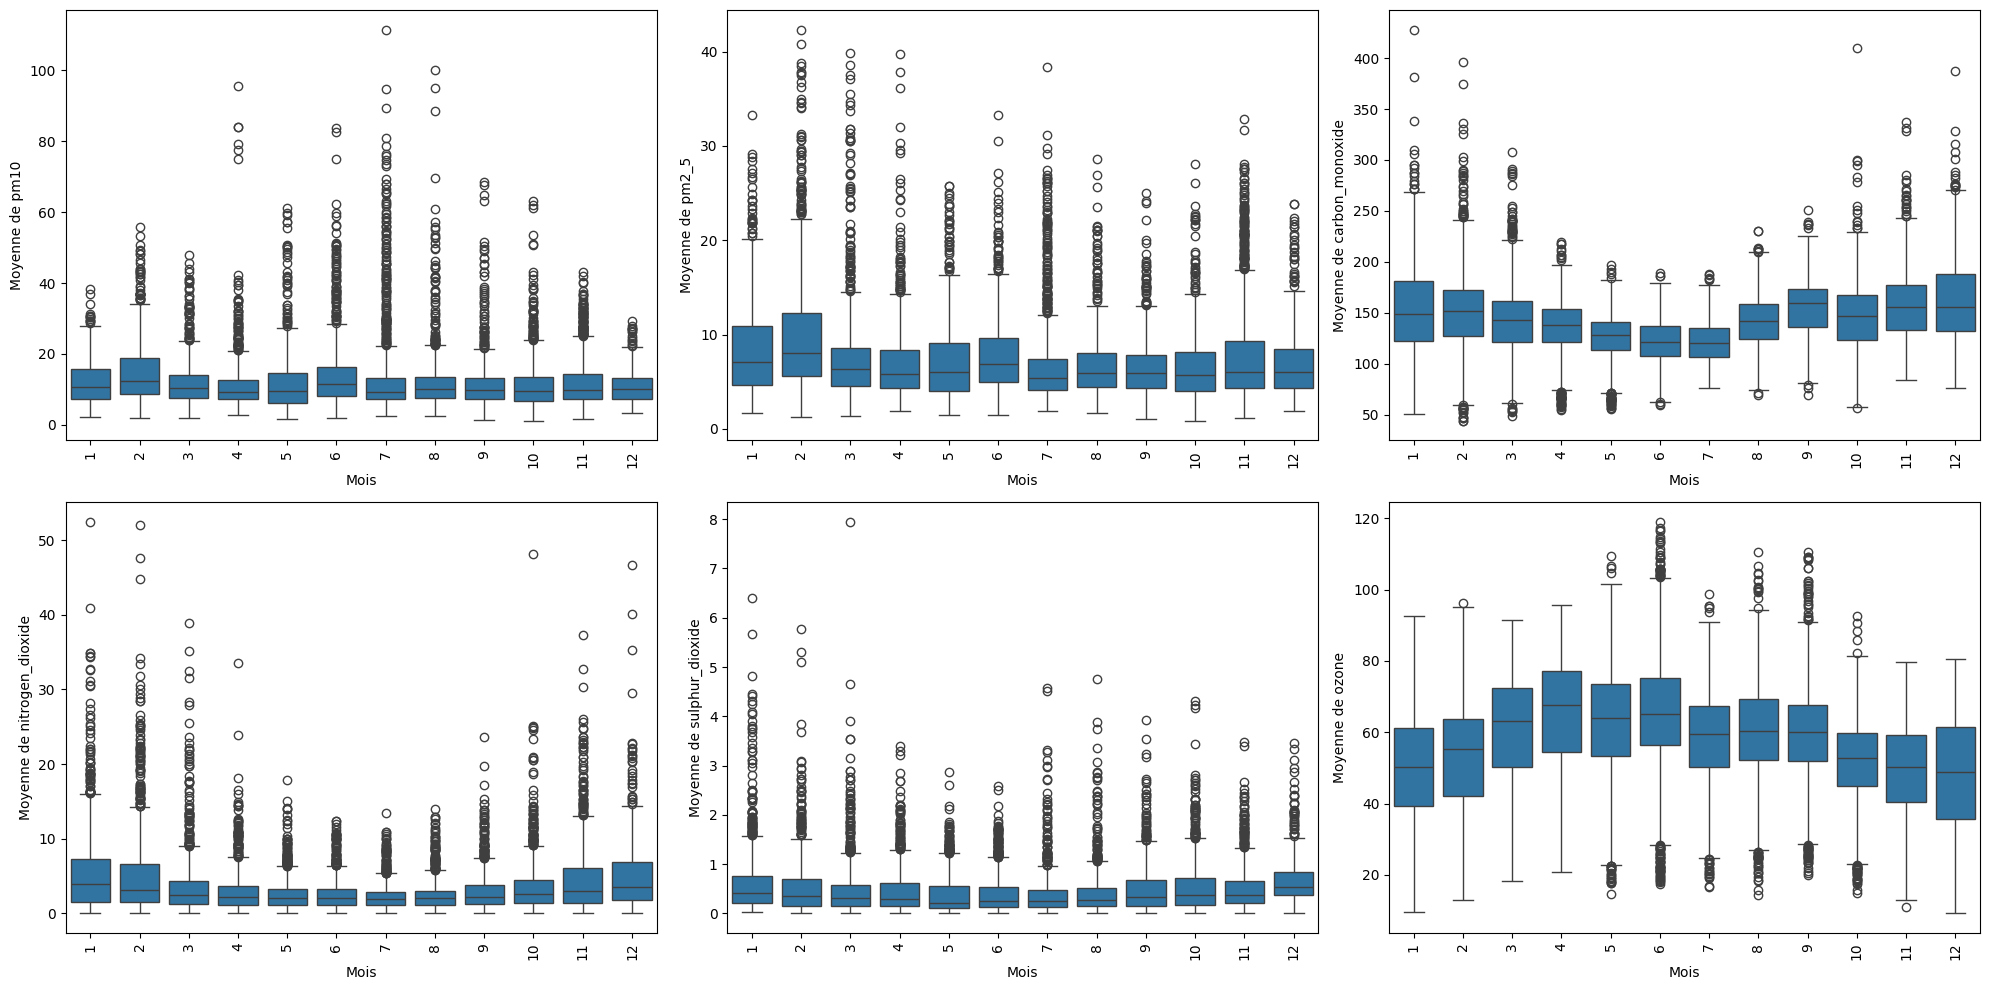

In [77]:
df_air_month=df[["pm10", "pm2_5", "carbon_monoxide", "nitrogen_dioxide", "sulphur_dioxide", "ozone","month"]]

# Initialiser une figure pour afficher les graphiques
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# Afficher un graphique pour chaque variable
for i, column in enumerate(df_air_month.drop(columns="month")):
    ax = axes[i//3, i%3]
    sns.boxplot(x=df_air_month["month"], y=df_air_month[column], ax=ax)
    #axes[i].set_title(f'Moyenne de {column} par mois')
    ax.set_xlabel('Mois')
    ax.set_ylabel(f'Moyenne de {column}')
    ax.tick_params(axis='x', rotation=90)
    #ax.set_xticks(list(range(1,13)))  # Définit les ticks de l'axe des X aux valeurs des mois
    #ax.set_xticklabels([month_dict[m] for m in list(range(1,13))])
    
    
# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()

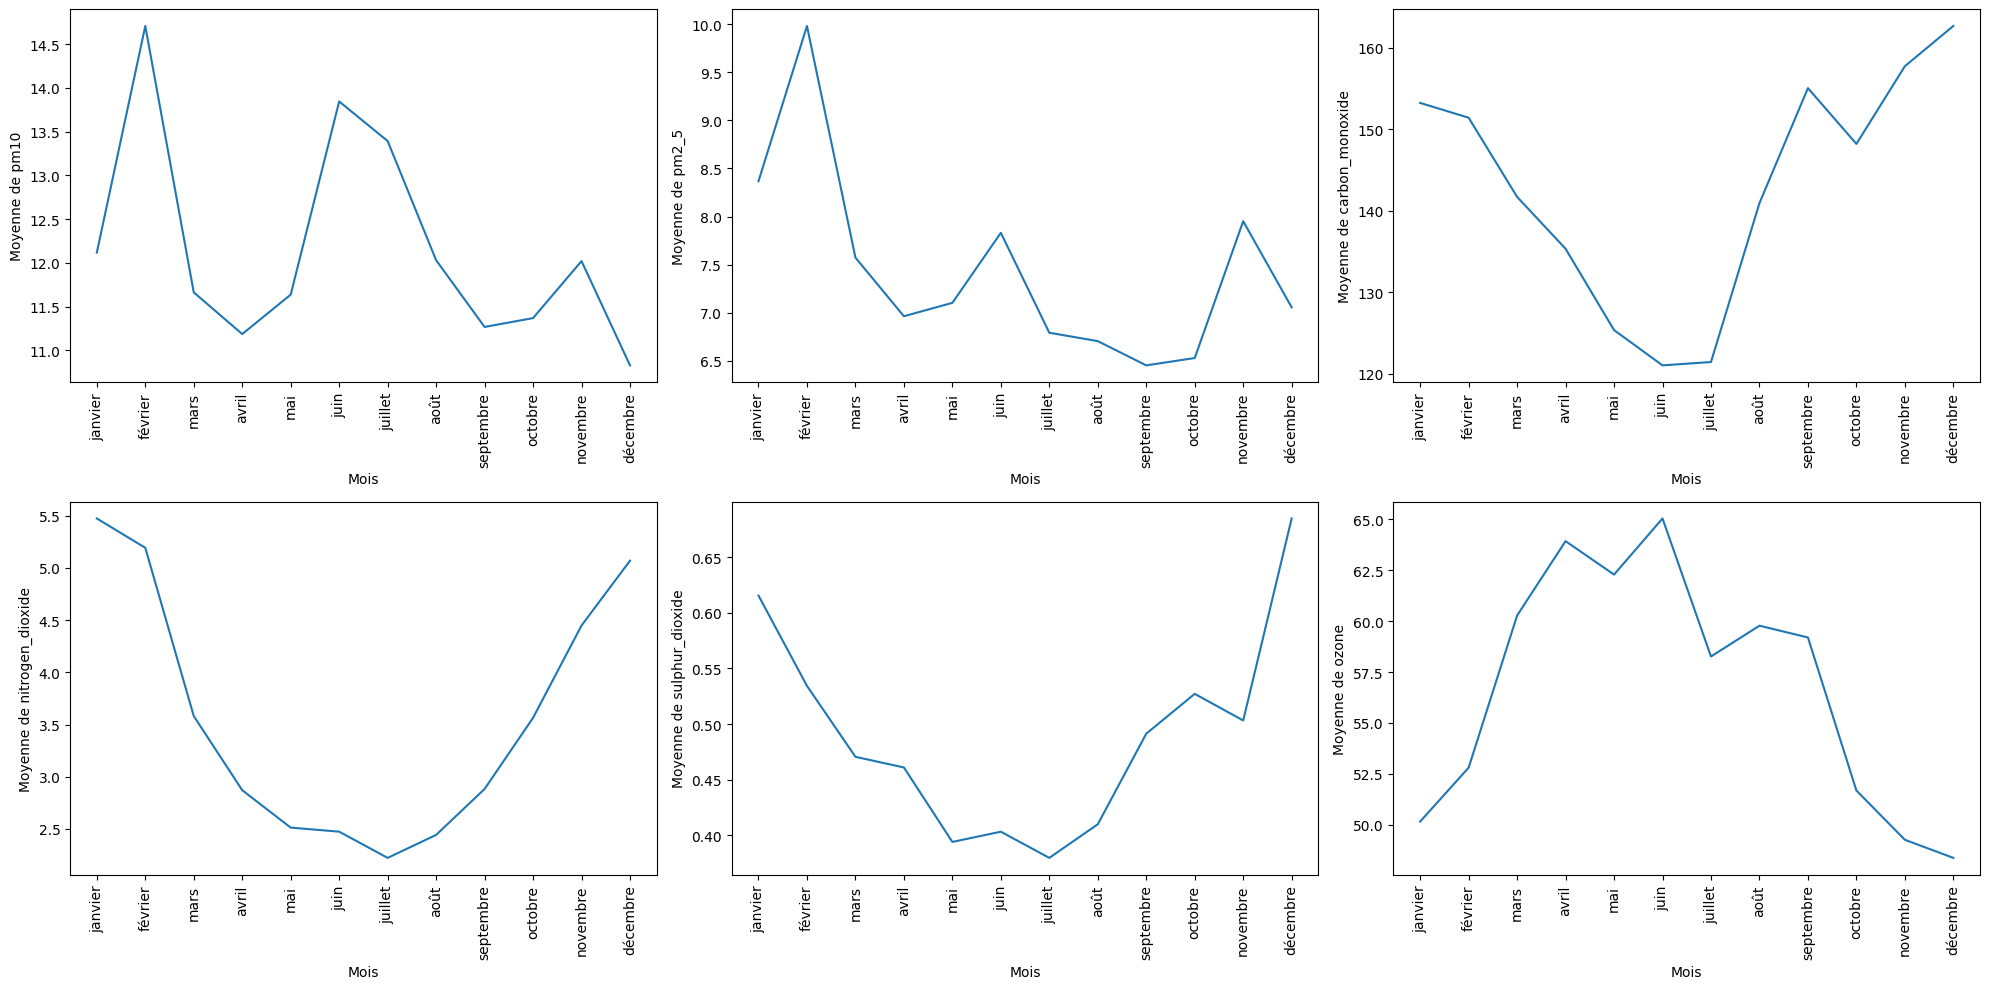

In [78]:
variables_air_month=["pm10", "pm2_5", "carbon_monoxide", "nitrogen_dioxide", "sulphur_dioxide", "ozone","month"]
df_air_month=df[variables_air_month].groupby("month").mean()

# Initialiser une figure pour afficher les graphiques
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# Afficher un graphique pour chaque variable
for i, column in enumerate(df_air_month):
    ax = axes[i//3, i%3]
    sns.lineplot(x=df_air_month.index, y=df_air_month[column], ax=ax)
    #axes[i].set_title(f'Moyenne de {column} par mois')
    ax.set_xlabel('Mois')
    ax.set_ylabel(f'Moyenne de {column}')
    ax.tick_params(axis='x', rotation=90)
    ax.set_xticks(df_air_month.index)  # Définit les ticks de l'axe des X aux valeurs des mois
    ax.set_xticklabels([month_dict[m] for m in df_air_month.index])
    
    
# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()

In [79]:
variables_air_region=["pm10", "pm2_5", "carbon_monoxide", "nitrogen_dioxide", "sulphur_dioxide", "ozone","region","longitude","latitude"]
df_air_region=df[variables_air_region].groupby(["region"]).mean()


In [80]:
df_air_region

pm10      pm2_5  carbon_monoxide  \
region                                                              
Auvergne-Rhône-Alpes        11.391398   8.019738       162.072678   
Bourgogne-Franche-Comté      9.689458   6.438536       152.833267   
Bretagne                    11.905880   7.311768       148.362198   
Centre-Val de Loire          9.917185   6.694089       155.458221   
Corse                        9.848196   5.443572       130.218979   
Grand Est                   10.403630   7.027137       162.140778   
Guadeloupe                  21.566626  10.501339       111.887444   
Guyane                       9.495708   6.344798       130.754593   
Hauts-de-France             12.268559   8.227059       161.319870   
La Réunion                  13.047875   7.297185        85.857559   
Martinique                  23.461018  11.394786       114.966911   
Mayotte                     10.508565   5.951494       100.908569   
Normandie                   11.407137   7.601459       153.909286   
Nouvelle-Aquitaine          10.411905   6.652667       154.064102   
Occitanie                   10.052964   6.451458       148.342377   
Pays de la Loire            11.940191   7.588369       155.640411   
Provence-Alpes-Côte d'Azur   8.852309   5.616756       141.794403   
Île-de-France               13.709042   9.406375       184.085297   

                            nitrogen_dioxide  sulphur_dioxide      ozone  \
region                                                                     
Auvergne-Rhône-Alpes                6.163274         0.549964  61.291965   
Bourgogne-Franche-Comté             3.534101         0.337881  65.474525   
Bretagne                            3.597988         0.318262  60.775654   
Centre-Val de Loire                 3.169827         0.282143  60.993690   
Corse                               1.727952         0.332905  72.720779   
Grand Est                           4.012548         0.412583  61.399883   
Guadeloupe                          0.801750         0.531286  49.847141   
Guyane                              0.054744         0.077711  30.264822   
Hauts-de-France                     6.272761         0.555869  55.656250   
La Réunion                          1.474616         1.021140  50.100891   
Martinique                          1.620556         1.073021  49.992619   
Mayotte                             0.080824         0.206765  46.537201   
Normandie                           4.785083         0.499726  60.985420   
Nouvelle-Aquitaine                  3.004595         0.309143  59.442322   
Occitanie                           3.409214         0.315976  61.131668   
Pays de la Loire                    4.541827         0.386280  59.968277   
Provence-Alpes-Côte d'Azur          2.604155         0.260893  66.594048   
Île-de-France                      11.921513         1.185018  55.022560   

                            longitude   latitude  
region                                            
Auvergne-Rhône-Alpes         4.536119  45.514642  
Bourgogne-Franche-Comté      4.806857  47.234282  
Bretagne                    -2.841463  48.177549  
Centre-Val de Loire          1.684391  47.484775  
Corse                        9.106152  42.151511  
Grand Est                    5.613112  48.688977  
Guadeloupe                 -61.539833  16.197646  
Guyane                     -53.239940   3.915167  
Hauts-de-France              2.771303  49.969594  
La Réunion                  55.532509 -21.133203  
Martinique                 -61.019379  14.654871  
Mayotte                     45.147435 -12.820617  
Normandie                    0.110932  49.120067  
Nouvelle-Aquitaine           0.212719  45.206040  
Occitanie                    2.143923  43.702500  
Pays de la Loire            -0.816786  47.478104  
Provence-Alpes-Côte d'Azur   6.061005  43.958789  
Île-de-France                2.503401  48.709316

In [81]:
df_air_region["LIBELLE_REGION"] = df_air_region.index
gd=france.merge(df_air_region, on="LIBELLE_REGION",how="inner")

In [82]:
gd=gd.to_crs(3857)

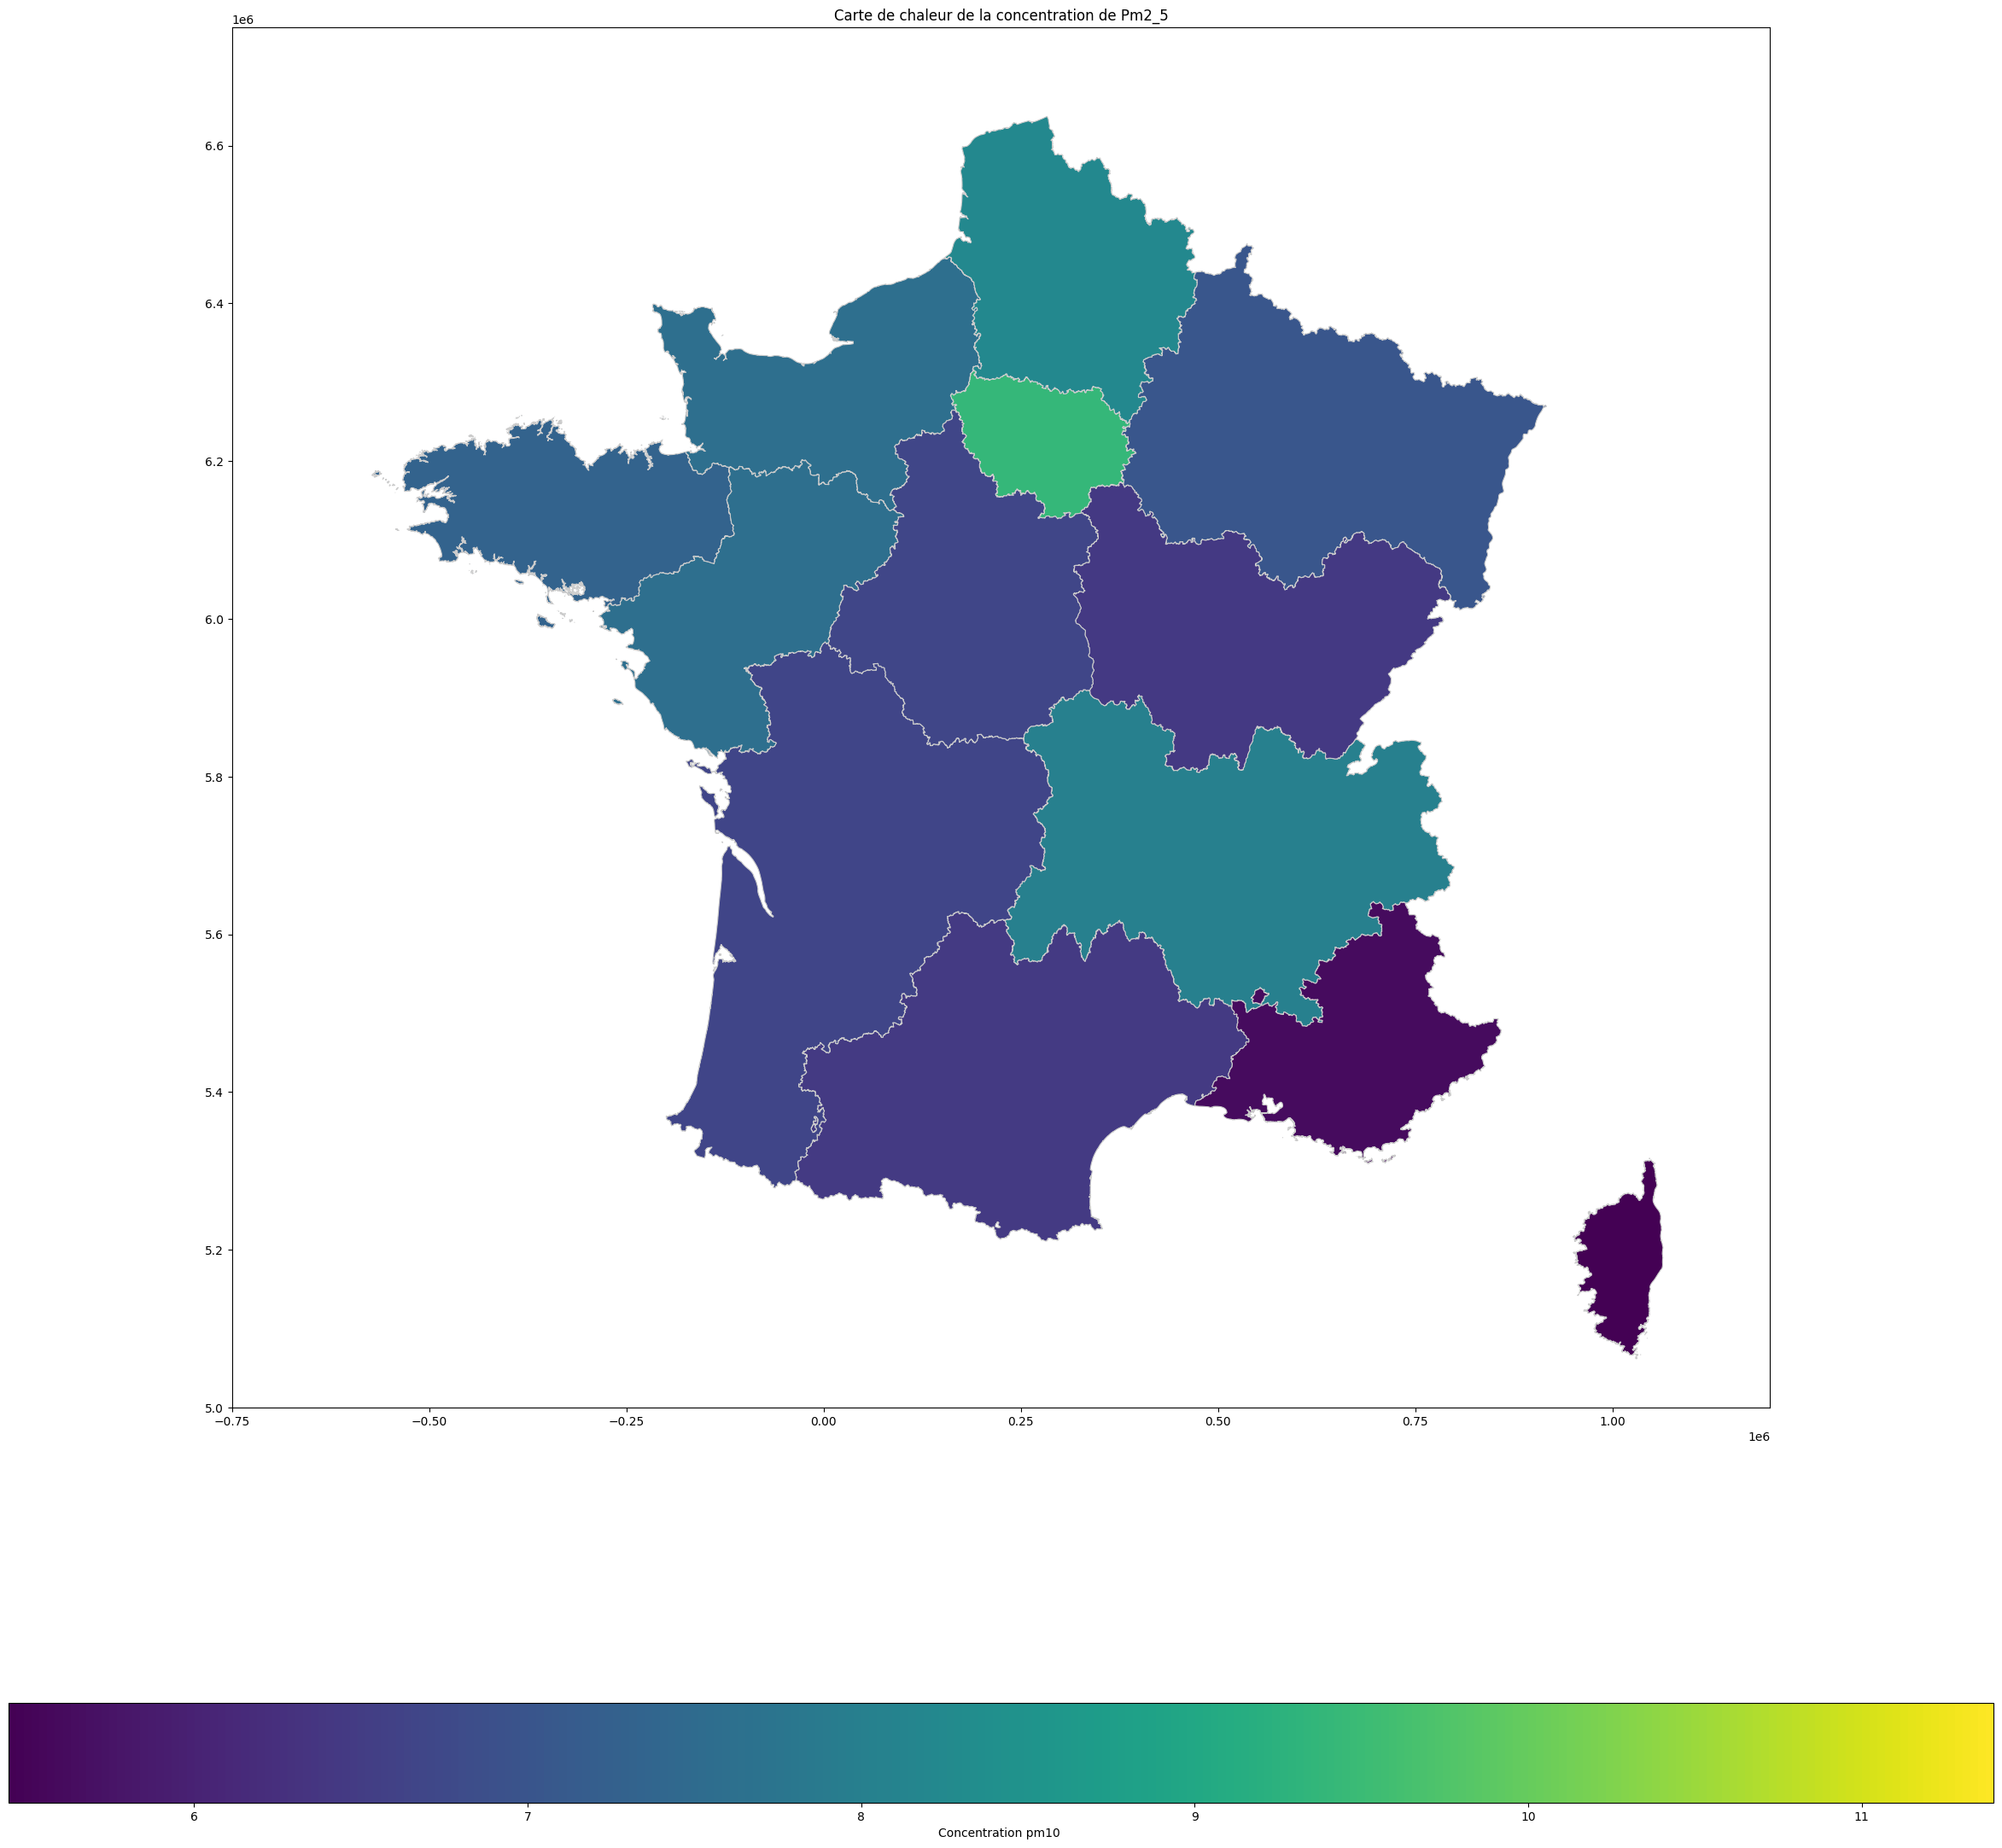

In [83]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(1, 1, figsize=(30, 30))

# Définir la palette de couleurs et la normalisation pour la variable
norm = mpl.colors.Normalize(vmin=gd['pm2_5'].min(), vmax=gd['pm2_5'].max())
cmap = plt.cm.viridis  # Choisissez votre palette de couleurs (par ex. viridis, plasma, etc.)

# Afficher la carte avec la coloration proportionnelle à la concentration de NO2

gd.plot(column='pm2_5', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, norm=norm, legend_kwds={'label': "Concentration pm10 ", 'orientation': "horizontal"})
# Ajuster les limites de l'axe pour que le cadre soit centré sur les géométries
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
#ax.set_xlim(bounds[0], bounds[2])  # minx, maxx
#ax.set_ylim(bounds[1], bounds[3])  # miny, maxy
# Ajouter un titre
ax.set_title("Carte de chaleur de la concentration de Pm2_5")

for idx, row in gd.iterrows():
    #Récupérer le centroïde de chaque région pour le positionner correctement
    centroid = row['geometry'].centroid
    #Ajouter le nom de la région au centroïde de la géométrie
    #ax.text(centroid.x, centroid.y, row['LIBELLE_REGION'], fontsize=25, ha='center', color='black', weight='bold')

# Afficher la carte
plt.show()

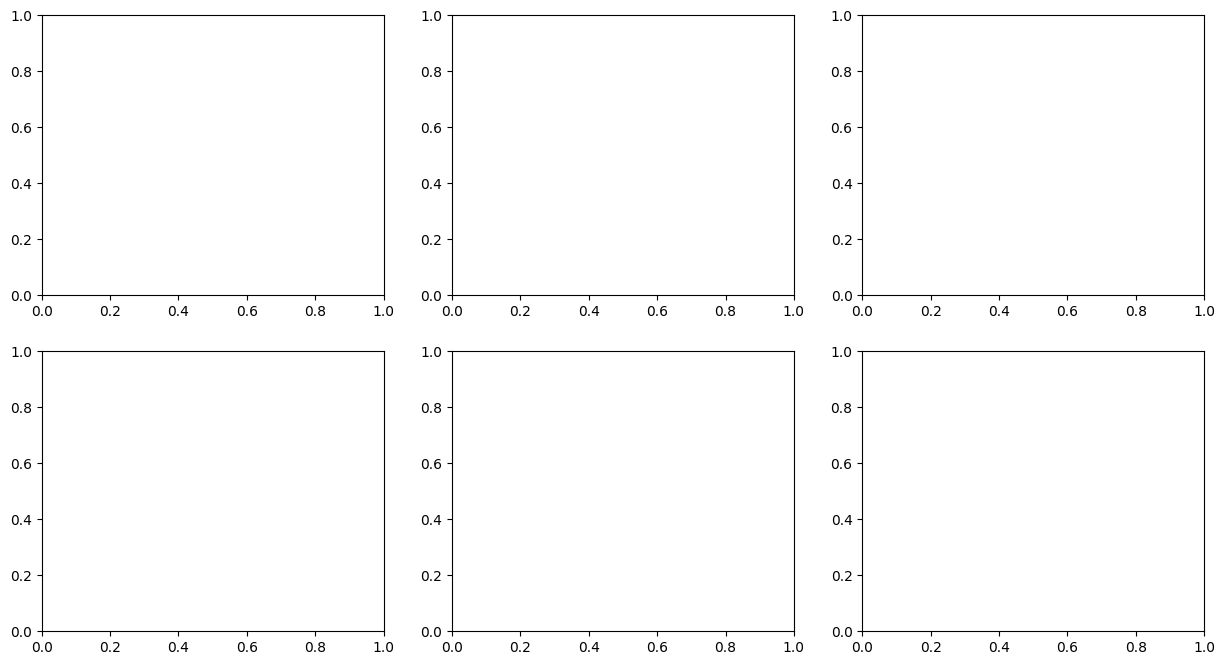

In [84]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(2, 3, figsize=(15, 8))

for i, col in enumerate(df_air_month):
    ax = axes[i//3, i%3]
    # Définir la palette de couleurs et la normalisation pour la variable
    norm = mpl.colors.Normalize(vmin=gd[col].min(), vmax=gd[col].max())
    cmap = plt.cm.viridis  # Choisissez votre palette de couleurs (par ex. viridis, plasma, etc.)

    # Afficher la carte avec la coloration proportionnelle à la concentration de NO2

    gd.plot(column=col, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, norm=norm, legend_kwds={'label': "Concentration ", 'orientation': "horizontal"})
    # Ajuster les limites de l'axe pour que le cadre soit centré sur les géométries
    #ax.set_xlim(xmin, xmax)
    #ax.set_ylim(ymin, ymax)
    # Ajouter un titre
    #ax.set_title("Carte de chaleur de la concentration de NO2")

# Afficher la carte
plt.show()

<Axes: xlabel='temperature_2m', ylabel='Count'>

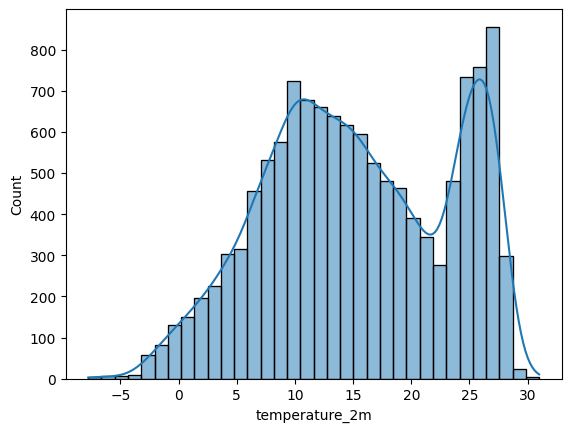

In [85]:
#pour les variables de températures
sns.histplot(df["temperature_2m"],kde=True)

In [86]:
df.drop(df[df['region'] == "Mayotte"].index, inplace=True)

In [87]:
"Guyane","Martinique","Mayotte"

('Guyane', 'Martinique', 'Mayotte')

Text(0.5, 1.0, 'Matrice de Corrélation')

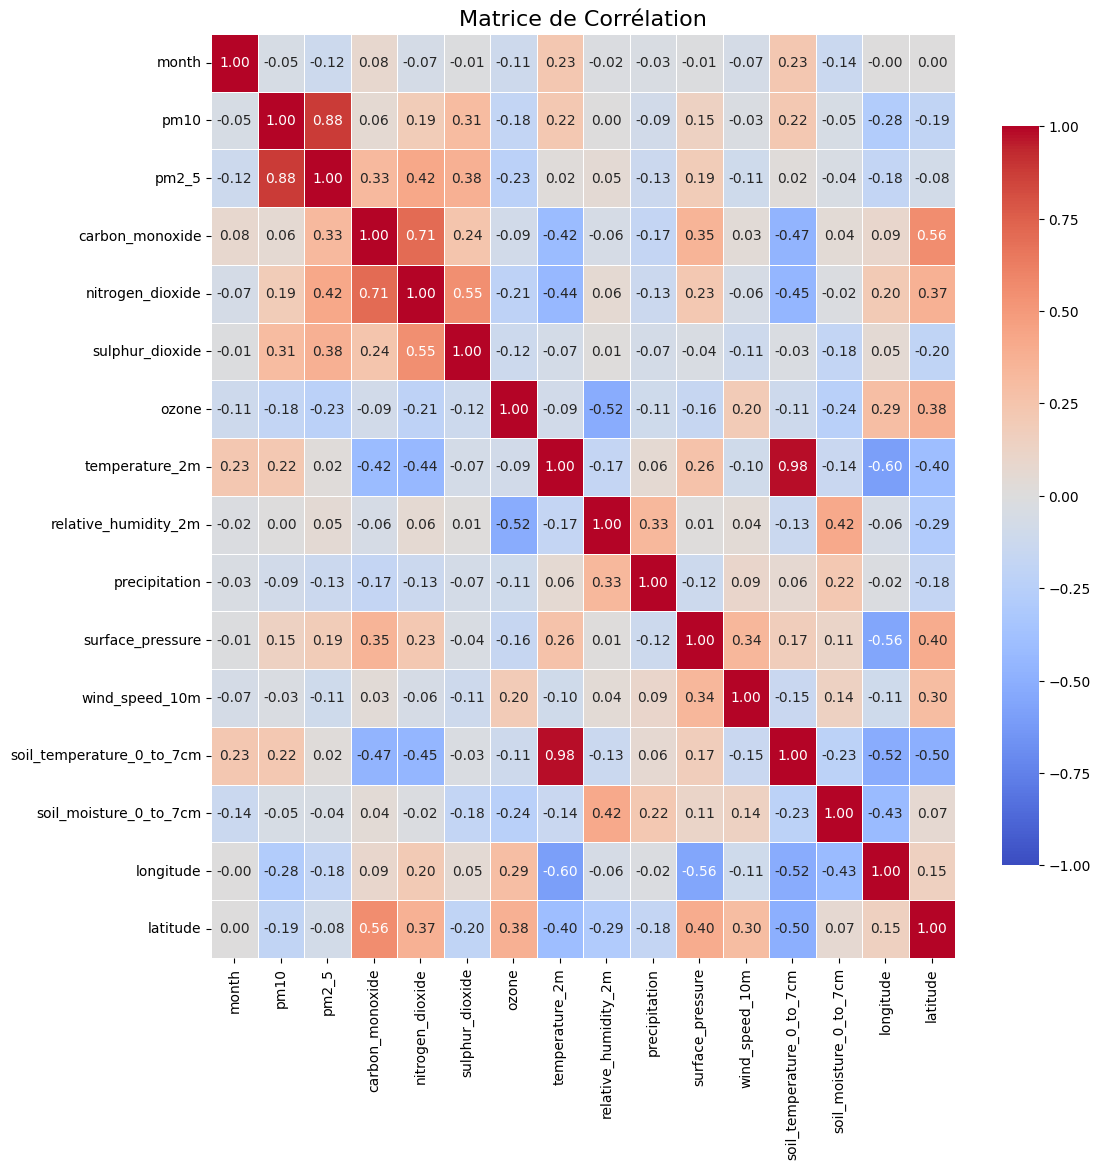

In [88]:
import numpy as np
corr_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 12))  # Taille de la figure
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            linewidths=0.5, fmt='.2f', cbar_kws={'shrink': 0.8})

# Titre
plt.title('Matrice de Corrélation', fontsize=16)

In [89]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [90]:
df

day  month                      region  \
0      2023-01-01      1        Auvergne-Rhône-Alpes   
1      2023-01-01      1     Bourgogne-Franche-Comté   
2      2023-01-01      1                    Bretagne   
3      2023-01-01      1         Centre-Val de Loire   
4      2023-01-01      1                       Corse   
...           ...    ...                         ...   
12595  2024-11-30     11          Nouvelle-Aquitaine   
12596  2024-11-30     11                   Occitanie   
12597  2024-11-30     11            Pays de la Loire   
12598  2024-11-30     11  Provence-Alpes-Côte d'Azur   
12599  2024-11-30     11               Île-de-France   

                           date       pm10      pm2_5  carbon_monoxide  \
0     2023-01-01 11:30:00+00:00  14.954166   7.858334       118.791664   
1     2023-01-01 11:30:00+00:00  13.300000   7.737500       120.375000   
2     2023-01-01 11:30:00+00:00   9.845834   5.720833       128.666672   
3     2023-01-01 11:30:00+00:00  13.750000   7.679167       125.416664   
4     2023-01-01 11:30:00+00:00   8.979167   5.345833        94.500000   
...                         ...        ...        ...              ...   
12595 2024-11-30 11:30:00+00:00  18.229166  13.808333       188.500000   
12596 2024-11-30 11:30:00+00:00  17.545834  11.079166       154.791672   
12597 2024-11-30 11:30:00+00:00  17.587500  14.254167       203.416672   
12598 2024-11-30 11:30:00+00:00  11.987500   8.958333       153.916672   
12599 2024-11-30 11:30:00+00:00  20.308332  17.858334       278.291656   

       nitrogen_dioxide  sulphur_dioxide      ozone  temperature_2m  \
0              3.475000         0.837500  62.250000       11.954083   
1              3.795833         0.741667  59.541668       10.743833   
2              3.395833         0.270833  64.916664       10.547750   
3              2.837500         0.770833  52.958332       14.431666   
4              2.208333         0.341667  52.833332        6.793917   
...                 ...              ...        ...             ...   
12595          6.112500         0.125000  34.000000        8.350833   
12596          3.558333         0.300000  46.500000        8.043750   
12597         11.408333         0.170833  21.916666        7.426333   
12598          2.941667         0.283333  52.916668        4.319167   
12599         17.637501         1.420833  22.916666        2.770833   

       relative_humidity_2m  precipitation  surface_pressure  wind_speed_10m  \
0                 71.024551       0.000000        964.791809       23.574928   
1                 77.391754       0.000000        963.939941       20.494823   
2                 89.859863       0.358333        998.909729       18.512320   
3                 66.970406       0.000000       1004.533508       18.958830   
4                 73.633392       0.000000        841.699280        4.792229   
...                     ...            ...               ...             ...   
12595             94.581047       0.000000       1013.913025        4.990263   
12596             88.042969       0.000000        999.240662        4.015523   
12597             98.097984       0.000000       1021.932678        7.446198   
12598             91.079193       0.004167        947.143555        3.672185   
12599             90.716217       0.000000       1021.944885        4.865319   

       soil_temperature_0_to_7cm  soil_moisture_0_to_7cm  longitude   latitude  
0                      10.964500                0.365333   4.536119  45.514642  
1                       9.506333                0.393667   4.806857  47.234282  
2                      10.185250                0.420542  -2.841463  48.177549  
3                      12.196250                0.262458   1.684391  47.484775  
4                       3.352250                0.466958   9.106152  42.151511  
...                          ...                     ...        ...        ...  
12595                   8.667500                0.370250   0.212719  45

AttributeError: Line2D.set() got an unexpected keyword argument 'col'

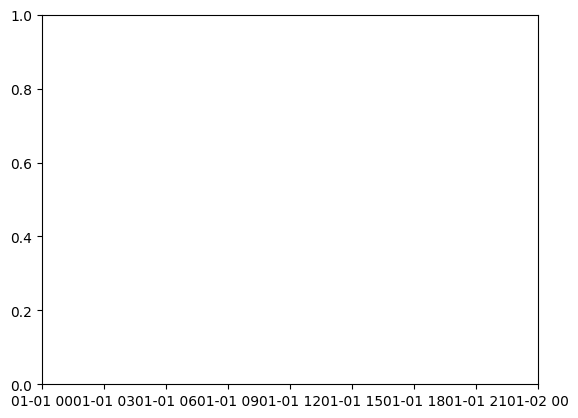

In [91]:
sns.lineplot(x=df["day"],y=df["pm2_5"],col="region")

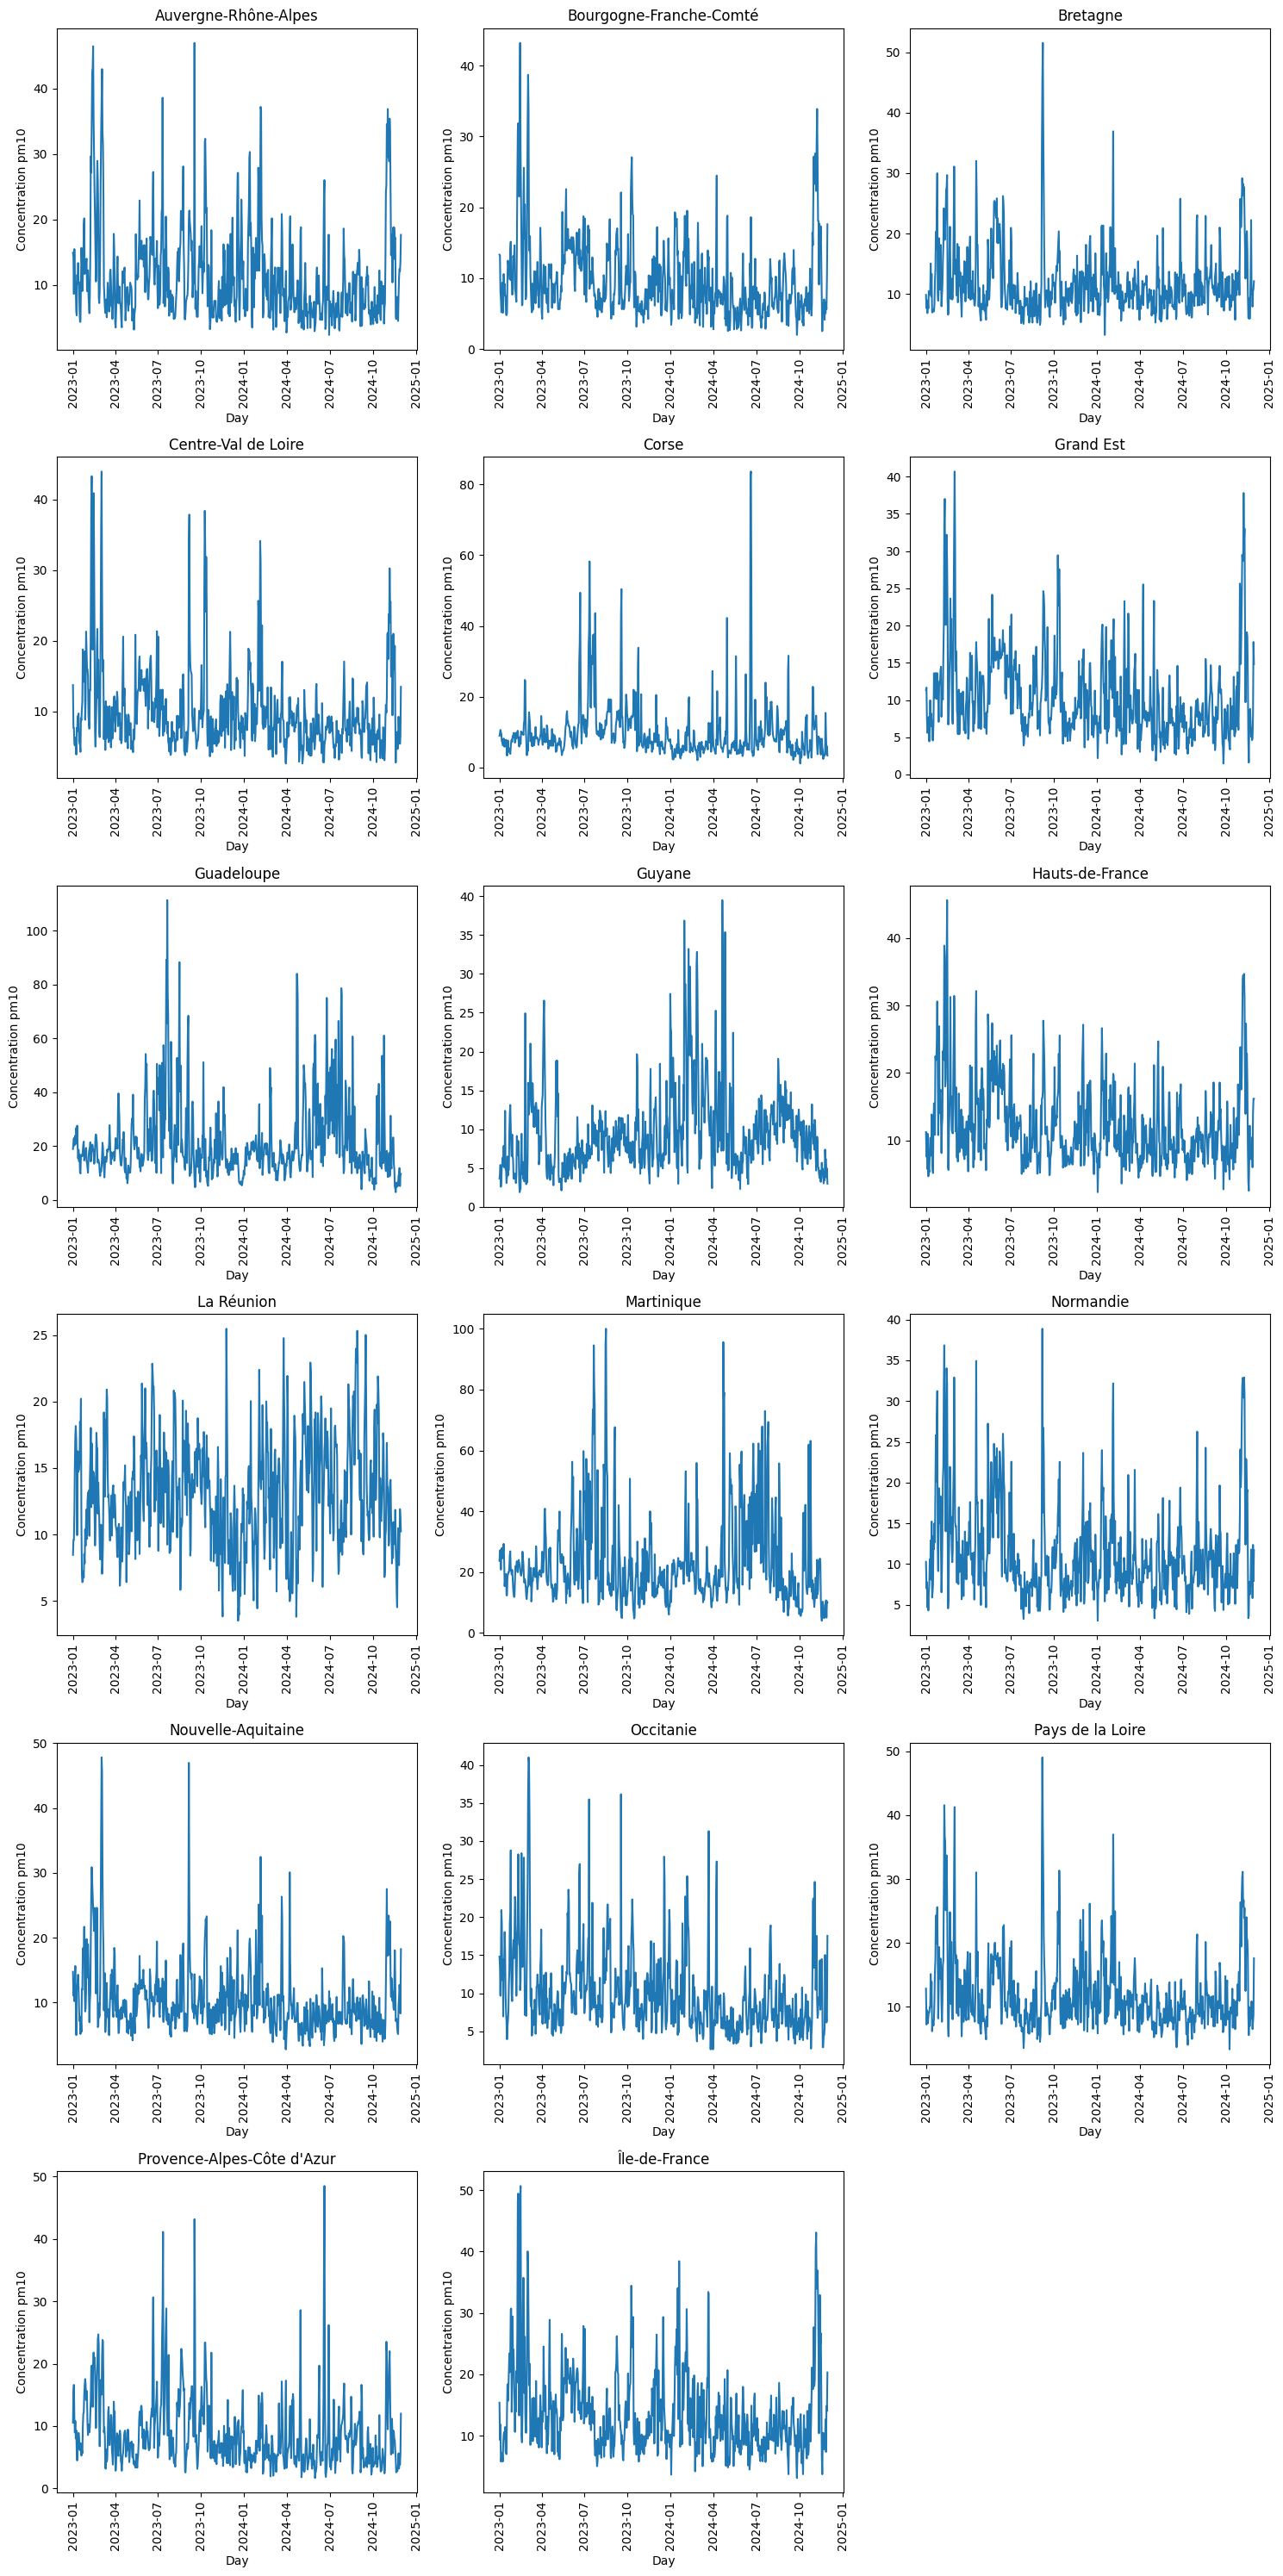

In [ ]:
###!!!!!!!!!! On peut créer une fonction qu'on va juste appeler pour chaque variable d'interet.

import math
# Liste des régions
regions = df['region'].unique()

# Déterminer la disposition des sous-graphiques
n_regions = len(regions)
n_cols = 3  # Nombre de colonnes de sous-graphiques
n_rows = math.ceil(n_regions / n_cols)  # Calculer le nombre de lignes

# Initialiser les sous-graphiques
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Aplatir pour un accès facile

# Tracer chaque région
for i, region in enumerate(regions):
    region_data = df[df['region'] == region]
    region_data = region_data.sort_values('day')  # Tri par date
    
    axes[i].plot(region_data['day'], region_data['pm10'])
    axes[i].set_title(region)
    axes[i].set_xlabel("Day")
    axes[i].set_ylabel("Concentration pm10")
    axes[i].tick_params(axis='x', rotation=90)
# Supprimer les sous-graphiques vides si le nombre de régions n'est pas un multiple de n_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajuster l'espacement
plt.tight_layout()
plt.show()

In [94]:
df_idf = df[df["region"]=="Île-de-France"]
df_idf

day  month         region                      date       pm10  \
17     2023-01-01      1  Île-de-France 2023-01-01 11:30:00+00:00  15.383334   
35     2023-01-02      1  Île-de-France 2023-01-02 11:30:00+00:00   9.312500   
53     2023-01-03      1  Île-de-France 2023-01-03 11:30:00+00:00  11.849999   
71     2023-01-04      1  Île-de-France 2023-01-04 11:30:00+00:00   5.800000   
89     2023-01-05      1  Île-de-France 2023-01-05 11:30:00+00:00   6.237500   
...           ...    ...            ...                       ...        ...   
12527  2024-11-26     11  Île-de-France 2024-11-26 11:30:00+00:00  12.691667   
12545  2024-11-27     11  Île-de-France 2024-11-27 11:30:00+00:00   7.362500   
12563  2024-11-28     11  Île-de-France 2024-11-28 11:30:00+00:00  14.870833   
12581  2024-11-29     11  Île-de-France 2024-11-29 11:30:00+00:00  14.041667   
12599  2024-11-30     11  Île-de-France 2024-11-30 11:30:00+00:00  20.308332   

           pm2_5  carbon_monoxide  nitrogen_dioxide  sulphur_dioxide  \
17      9.358334       156.625000          7.616667         1.375000   
35      6.445833       173.666672         16.291666         1.337500   
53      7.379167       181.000000         13.200000         1.141667   
71      3.862500       144.666672          7.841667         1.187500   
89      4.679166       149.750000         14.345833         1.300000   
...          ...              ...               ...              ...   
12527   8.512500       193.083328         13.220833         0.916667   
12545   5.725000       171.625000         11.762500         0.775000   
12563  12.295834       227.041672         19.445833         1.537500   
12581  11.537499       207.750000         12.087501         0.920833   
12599  17.858334       278.291656         17.637501         1.420833   

           ozone  temperature_2m  relative_humidity_2m  precipitation  \
17     46.500000       13.652084             71.534920       0.079167   
35     49.625000       10.062500             89.010780       0.404167   
53     45.166668        7.752083             91.482140       0.062500   
71     57.375000       11.695834             89.660561       0.112500   
89     51.375000       12.356251             88.560097       0.020833   
...          ...             ...                   ...            ...   
12527  48.250000        8.658334             88.946800       0.108333   
12545  51.750000       10.439584             91.109230       0.254167   
12563  35.708332        6.358334             84.380318       0.004167   
12581  44.166668        3.558333             85.608681       0.000000   
12599  22.916666        2.770833             90.716217       0.000000   

       surface_pressure  wind_speed_10m  soil_temperature_0_to_7cm  \
17          1009.788025       19.753124                  11.933334   
35          1015.033752       13.947431                  10.275001   
53          1022.744385       16.570414                   7.570833   
71          1019.289001       25.613174                  10.195834   
89          1019.476074       15.305164                  11.518750   
...                 ...             ...                        ...   
12527       1014.152649       11.292778                   8.785417   
12545       1012.352295       17.599253                   9.512501   
12563       1022.028015        6.830119                   7.887500   
12581       1023.345276        9.613878                   4.350000   
12599       1021.944885        4.865319                   3.306250   

       soil_moisture_0_to_7cm  longitude   latitude  
17                   0.380125   2.503401  48.709316  
35                   0.405833   2.503401  48.709316  
53                   0.389208   2.503401  48.709316  
71                   0.391167   2.503401  48.709316  
89                   0.380958   2.503401  48.709316  
...                       ...        ...        ...  
12527                0.402167   2.503401  48.709316  
12545                0.395292   2.5034

<Axes: xlabel='day', ylabel='pm10'>

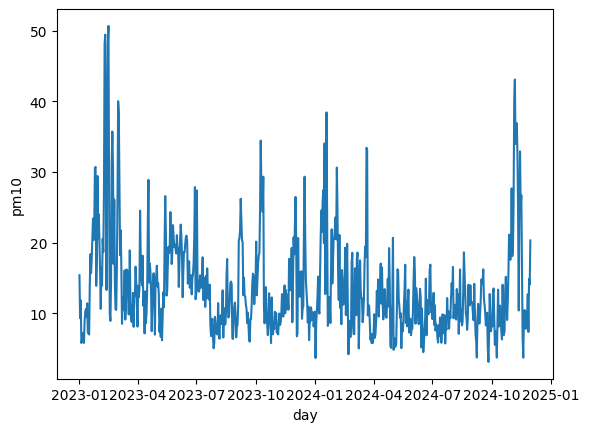

In [95]:
sns.lineplot(x=df_idf["day"],y=df_idf["pm10"])

In [65]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -------- ------------------------------- 2.1/9.8 MB 10.7 MB/s eta 0:00:01
   ----------------- ---------------------- 4.2/9.8 MB 10.5 MB/s eta 0:00:01
   ---------------------------- ----------- 7.1/9.8 MB 11.5 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.8 MB 12.3 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 11.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [76]:
df_idf.shape

(700, 19)

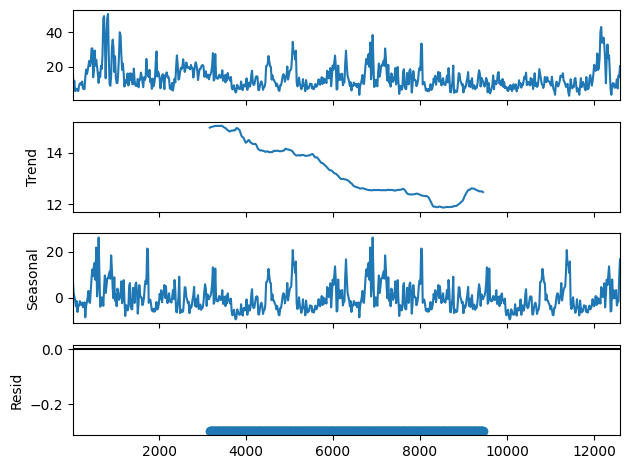

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_idf[["pm10"]], model='additive',period=365)
decomposition.plot()
plt.show()

In [96]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_idf["pm10"])
print(f"ADF Statistic: {result[0]}")
print(f"P-Value: {result[1]}")

ADF Statistic: -4.543861303729894
P-Value: 0.00016370672299803759


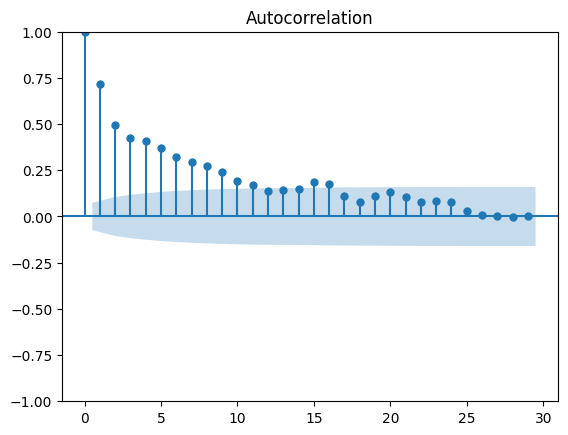

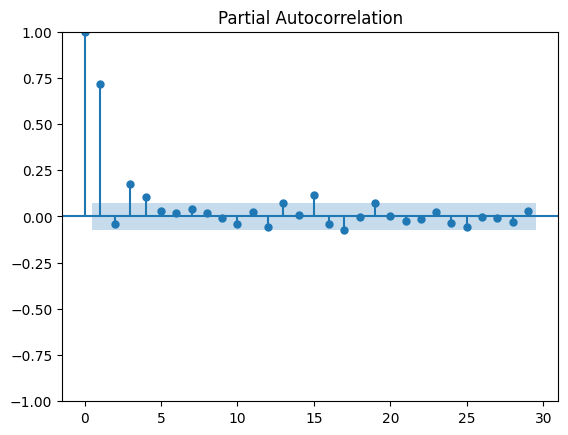

In [97]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_idf["pm10"])
plot_pacf(df_idf["pm10"])
plt.show()

c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


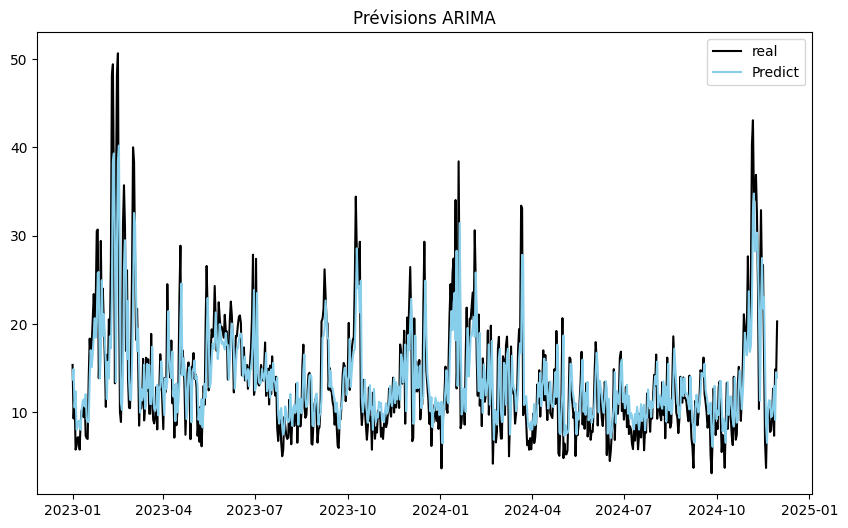

In [124]:
# ARIMA LİBRARY
from statsmodels.tsa.arima.model import ARIMA
#from pandas import datetime

# fit model
model = ARIMA(df_idf["pm10"], order=(1,0,0)) 
model_fit = model.fit()

#prediction
plt.figure(figsize=(10, 6))
plt.plot(df_idf["day"],df_idf["pm10"], label="real",color="black")
plt.plot(df_idf["day"],model_fit.predict(), label="Predict", color='skyblue')
plt.title("Prévisions ARIMA")
plt.legend()
plt.show()


c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


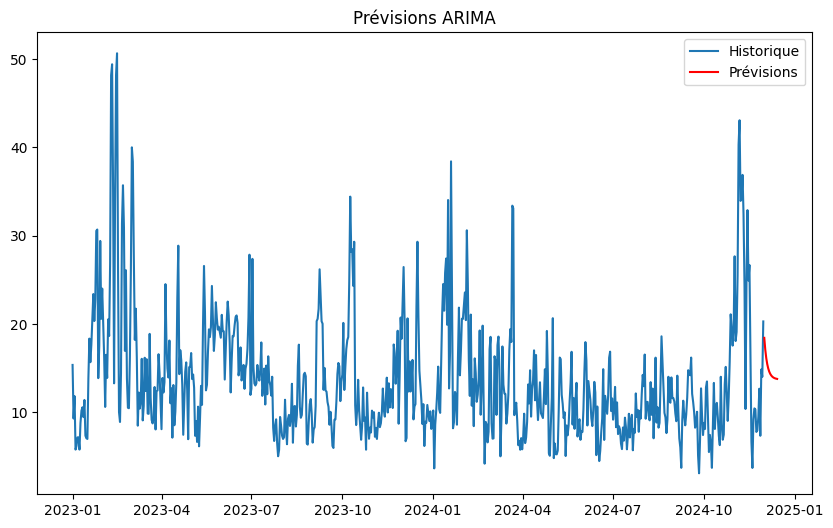

In [125]:
#forecast
forecast_steps = 14 #2semaines
forecast = model_fit.forecast(steps=forecast_steps)
# Visualisation des prévisions
plt.figure(figsize=(10, 6))
plt.plot(df_idf["day"],df_idf["pm10"], label="Historique")
plt.plot(pd.date_range(max(df_idf["day"]), periods=forecast_steps+1, freq='D')[1:], 
         forecast, label="Prévisions", color='red')
plt.title("Prévisions ARIMA")
plt.legend()
plt.show()

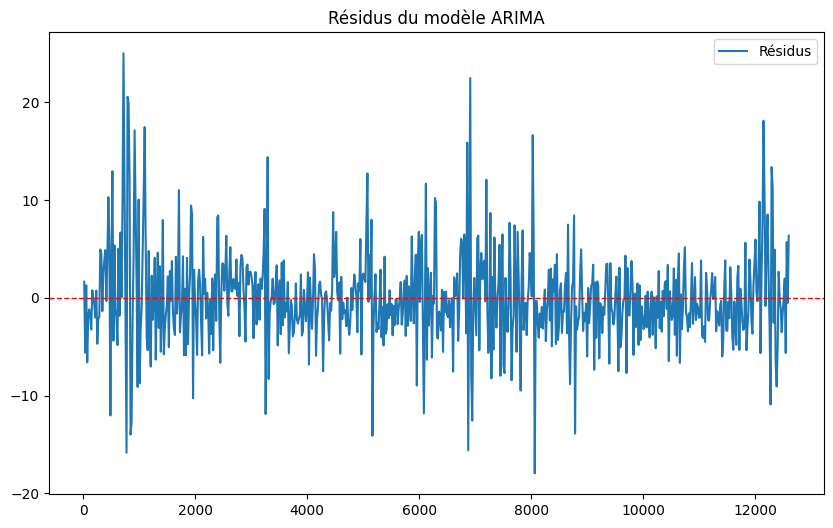

In [127]:
# Visualisation des résidus
residuals = model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Résidus")
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.title("Résidus du modèle ARIMA")
plt.legend()
plt.show()

In [ ]:
#from sklearn.metrics import mean_squared_error

#mse = mean_squared_error(data['value'].iloc[1:], data['fitted'].iloc[1:])
#rmse = np.sqrt(mse)
#print(f"RMSE: {rmse:.2f}")

In [ ]:
### verifier la stationnarité et différencier si necessaire les chroniques.

In [232]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_idf_var=scaler.fit_transform(df_idf_var)


In [242]:
#df_idf.set_index("day",inplace=True)
df_idf_var =  df_idf[["pm10","pm2_5","temperature_2m", "relative_humidity_2m", "precipitation", "surface_pressure", "wind_speed_10m", "soil_temperature_0_to_7cm", "soil_moisture_0_to_7cm"]]
#df_idf_var =  df_idf[["pm10","pm2_5","temperature_2m", "relative_humidity_2m", "precipitation", "surface_pressure", "wind_speed_10m"]]
#df_idf_var =  df_idf[["pm10","pm2_5"]]
df_idf_var = pd.DataFrame(scaler.fit_transform(df_idf_var), columns=df_idf_var.columns, index=df_idf_var.index)
train_size = int(len(df_idf_var) * 0.95) #entrainement 90%
train, test = df_idf_var[:train_size], df_idf_var[train_size:]

In [243]:
df_idf_var

pm10     pm2_5  temperature_2m  relative_humidity_2m  \
day                                                                    
2023-01-01  0.240121 -0.008347        0.096452             -0.674185   
2023-01-02 -0.630537 -0.514383       -0.486798              1.110819   
2023-01-03 -0.266617 -0.352220       -0.862204              1.363247   
2023-01-04 -1.134287 -0.963228       -0.221408              1.177189   
2023-01-05 -1.071543 -0.821335       -0.114100              1.064786   
...              ...       ...             ...                   ...   
2024-11-26 -0.145908 -0.155307       -0.714953              1.104284   
2024-11-27 -0.910199 -0.639625       -0.425528              1.325158   
2024-11-28  0.166620  0.502033       -1.088666              0.637859   
2024-11-29  0.047704  0.370275       -1.543621              0.763325   
2024-11-30  0.946447  1.468496       -1.671577              1.285015   

            precipitation  surface_pressure  wind_speed_10m  \
day                                                           
2023-01-01      -0.176358         -0.053938        1.133370   
2023-01-02       1.402707          0.491810        0.116135   
2023-01-03      -0.257336          1.293998        0.575717   
2023-01-04      -0.014402          0.934511        2.160129   
2023-01-05      -0.459780          0.953974        0.354028   
...                   ...               ...             ...   
2024-11-26      -0.034647          0.400143       -0.348995   
2024-11-27       0.673908          0.212840        0.755983   
2024-11-28      -0.540757          1.219469       -1.130912   
2024-11-29      -0.561002          1.356512       -0.643161   
2024-11-30      -0.561002          1.210820       -1.475171   

            soil_temperature_0_to_7cm  soil_moisture_0_to_7cm  
day                                                            
2023-01-01                  -0.261522                0.743468  
2023-01-02                  -0.530136                1.089328  
2023-01-03                  -0.968152                0.865668  
2023-01-04                  -0.542959                0.892014  
2023-01-05                  -0.328675                0.754679  
...                               ...                     ...  
2024-11-26                  -0.771416                1.039999  
2024-11-27                  -0.653644                0.947508  
2024-11-28                  -0.916859                0.897619  
2024-11-29                  -1.489857                0.831474  
2024-11-30                  -1.658921                0.695821  

[700 rows x 9 columns]

In [244]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series)
    #print(f"ADF Statistic: {result[0]}")
    #print(f"p-value: {result[1]}")
    if result[1] < 0.05:
        print("La série est stationnaire.")
    else:
        print("La série n'est pas stationnaire.")

# Tester la stationnarité de chaque colonne
for col in df_idf_var.columns:
    print(f"\nTest de stationnarité pour {col}:")
    check_stationarity(df_idf_var[col])


Test de stationnarité pour pm10:
La série est stationnaire.

Test de stationnarité pour pm2_5:
La série est stationnaire.

Test de stationnarité pour temperature_2m:
La série n'est pas stationnaire.

Test de stationnarité pour relative_humidity_2m:
La série est stationnaire.

Test de stationnarité pour precipitation:
La série est stationnaire.

Test de stationnarité pour surface_pressure:
La série est stationnaire.

Test de stationnarité pour wind_speed_10m:
La série est stationnaire.

Test de stationnarité pour soil_temperature_0_to_7cm:
La série n'est pas stationnaire.

Test de stationnarité pour soil_moisture_0_to_7cm:
La série est stationnaire.


In [245]:
#selection ordre du modèle
from statsmodels.tsa.api import VAR

# Initialiser le modèle
model = VAR(train)

# Sélection de l'ordre optimal
selected_order = model.select_order(maxlags=15)  # Ajustez maxlags en fonction des données
print(selected_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -9.575      -9.513   6.945e-05      -9.551
1       -18.84     -18.22*   6.555e-09      -18.60
2      -19.29*      -18.11  4.205e-09*     -18.83*
3       -19.25      -17.51   4.370e-09      -18.58
4       -19.20      -16.90   4.602e-09      -18.31
5       -19.10      -16.24   5.104e-09      -17.99
6       -19.03      -15.62   5.449e-09      -17.71
7       -18.95      -14.99   5.902e-09      -17.41
8       -18.81      -14.29   6.816e-09      -17.06
9       -18.72      -13.64   7.476e-09      -16.75
10      -18.59      -12.95   8.559e-09      -16.40
11      -18.50      -12.31   9.405e-09      -16.10
12      -18.47      -11.71   9.824e-09      -15.85
13      -18.38      -11.06   1.083e-08      -15.54
14      -18.27      -10.40   1.218e-08      -15.22
15      -18.19      -9.758   1.335e-08      -14.92
-------------------------------

c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [246]:
optimal_lag = selected_order.aic
optimal_lag

np.int64(2)

In [254]:
# Fitting the VAR model with the optimal lag
optimal_lag=1
var_model = model.fit(optimal_lag)

# Summary of the VAR model
var_model_summary = var_model.summary()
var_model_summary

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 20, Dec, 2024
Time:                     21:59:58
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                   -18.2464
Nobs:                     664.000    HQIC:                  -18.6198
Log likelihood:          -2129.35    FPE:                6.47009e-09
AIC:                     -18.8561    Det(Omega_mle):     5.65567e-09
--------------------------------------------------------------------
Results for equation pm10
                                  coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------------
const                               -0.016387         0.025746           -0.636           0.524
L1.pm10                              0.680733         0.093049            7.316           0.000
L

In [255]:
# Faire des prédictions
forecast_steps = len(test)
forecast = var_model.forecast(y=train.values, steps=forecast_steps)

# Convertir les prévisions en DataFrame
forecast_df = pd.DataFrame(forecast, index=test.index, columns=df_idf_var.columns)
forecast_df



pm10     pm2_5  temperature_2m  relative_humidity_2m  \
day                                                                    
2024-10-27 -0.336071 -0.043750        0.264537              1.045924   
2024-10-28 -0.377606 -0.148370        0.242582              0.720908   
2024-10-29 -0.382272 -0.201126        0.213997              0.505638   
2024-10-30 -0.360760 -0.215098        0.190500              0.359128   
2024-10-31 -0.325310 -0.206584        0.174627              0.257695   
2024-11-01 -0.285342 -0.188166        0.165167              0.185677   
2024-11-02 -0.246677 -0.167560        0.160035              0.132568   
2024-11-03 -0.212204 -0.148638        0.157436              0.091603   
2024-11-04 -0.182900 -0.132851        0.156145              0.058650   
2024-11-05 -0.158690 -0.120370        0.155432              0.031292   
2024-11-06 -0.139022 -0.110815        0.154900              0.008145   
2024-11-07 -0.123203 -0.103650        0.154351             -0.011607   
2024-11-08 -0.110556 -0.098353        0.153692             -0.028486   
2024-11-09 -0.100487 -0.094488        0.152882             -0.042870   
2024-11-10 -0.092498 -0.091707        0.151903             -0.055063   
2024-11-11 -0.086181 -0.089737        0.150753             -0.065332   
2024-11-12 -0.081203 -0.088369        0.149436             -0.073913   
2024-11-13 -0.077294 -0.087443        0.147960             -0.081020   
2024-11-14 -0.074235 -0.086834        0.146337             -0.086845   
2024-11-15 -0.071851 -0.086446        0.144581             -0.091560   
2024-11-16 -0.069996 -0.086206        0.142709             -0.095315   
2024-11-17 -0.068557 -0.086058        0.140736             -0.098246   
2024-11-18 -0.067440 -0.085961        0.138678             -0.100469   
2024-11-19 -0.066573 -0.085885        0.136553             -0.102087   
2024-11-20 -0.065895 -0.085808        0.134374             -0.103191   
2024-11-21 -0.065360 -0.085714        0.132157             -0.103860   
2024-11-22 -0.064932 -0.085595        0.129914             -0.104161   
2024-11-23 -0.064582 -0.085444        0.127657             -0.104154   
2024-11-24 -0.064288 -0.085259        0.125397             -0.103891   
2024-11-25 -0.064033 -0.085039        0.123143             -0.103415   
2024-11-26 -0.063805 -0.084784        0.120904             -0.102764   
2024-11-27 -0.063593 -0.084497        0.118687             -0.101972   
2024-11-28 -0.063390 -0.084181        0.116497             -0.101067   
2024-11-29 -0.063192 -0.083838        0.114341             -0.100073   
2024-11-30 -0.062996 -0.083471        0.112223             -0.099010   

            precipitation  surface_pressure  wind_speed_10m  \
day                                                           
2024-10-27       0.276002         -0.041061       -0.642250   
2024-10-28       0.191047          0.002220       -0.333468   
2024-10-29       0.125046          0.047212       -0.203404   
2024-10-30       0.077730          0.084621       -0.150701   
2024-10-31       0.046172          0.110761       -0.128173   
2024-11-01       0.026015          0.125859       -0.115908   
2024-11-02       0.013416          0.131907       -0.106555   
2024-11-03       0.005612          0.131274       -0.097934   
2024-11-04       0.000823          0.126056       -0.089681   
2024-11-05      -0.002026          0.117879       -0.081896   
2024-11-06      -0.003577          0.107930       -0.074696   
2024-11-07      -0.004222          0.097041       -0.068123   
2024-11-08      -0.004219          0.085788       -0.062157   
2024-11-09      -0.003752          0.074571       -0.056748   
2024-11-10      -0.002961          0.063662       -0.051840   
2024-11-11      -0.001952          0.053245       -0.047377   
2024-11-12      -0.000812          0.043438       -0.043312   
2024-11-13       0.000394          0.034312       -0.039604   
2024-11-14       0.001618          0.025900       -0.036215   
2024-11-15       0.002821   

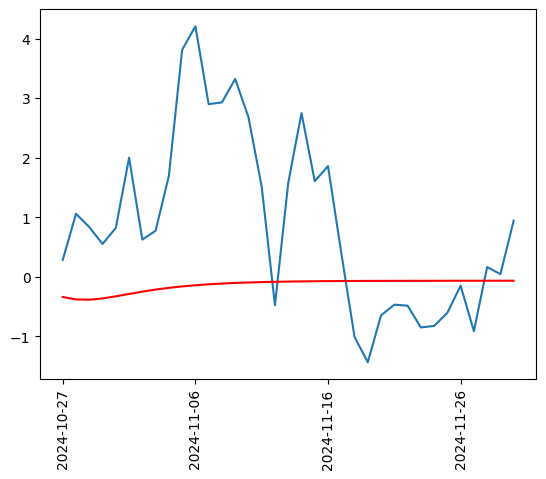

In [256]:
# Visualiser les prévisions
plt.Figure((10,5))
plt.plot(test["pm10"],label="real")
plt.plot(forecast_df["pm10"],label="predicted",color="red")
plt.xticks(ticks=test.index[::10],rotation=90)
plt.show()

In [257]:
resid = var_model.resid
print(resid.describe())

               pm10         pm2_5  temperature_2m  relative_humidity_2m  \
count  6.640000e+02  6.640000e+02    6.640000e+02          6.640000e+02   
mean  -6.955614e-17 -6.353686e-17    3.812212e-17          1.738904e-16   
std    6.562677e-01  6.224308e-01    3.003627e-01          6.147411e-01   
min   -2.297244e+00 -2.521570e+00   -1.044314e+00         -1.952893e+00   
25%   -3.866772e-01 -3.267612e-01   -1.808304e-01         -4.034273e-01   
50%   -3.948100e-02 -4.041672e-02   -1.081476e-02         -3.240102e-02   
75%    3.224196e-01  2.455127e-01    1.979307e-01          3.962677e-01   
max    3.242018e+00  3.442766e+00    8.693939e-01          2.247858e+00   

       precipitation  surface_pressure  wind_speed_10m  \
count   6.640000e+02      6.640000e+02    6.640000e+02   
mean    8.025709e-18     -8.426994e-17   -9.898374e-17   
std     9.550305e-01      5.578211e-01    7.898569e-01   
min    -1.267421e+00     -2.472902e+00   -2.157422e+00   
25%    -5.152437e-01     -2.867652

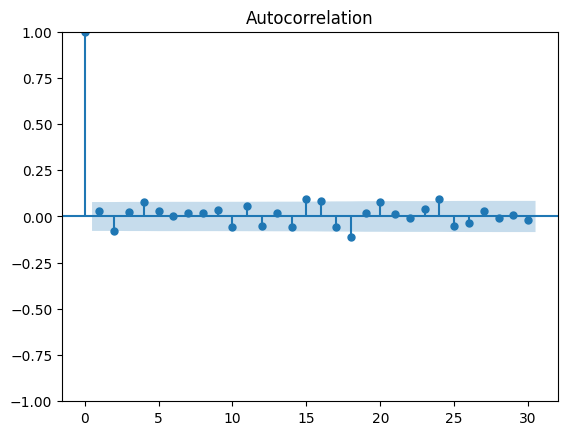

In [224]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(resid["pm10"], lags=30)
plt.show()

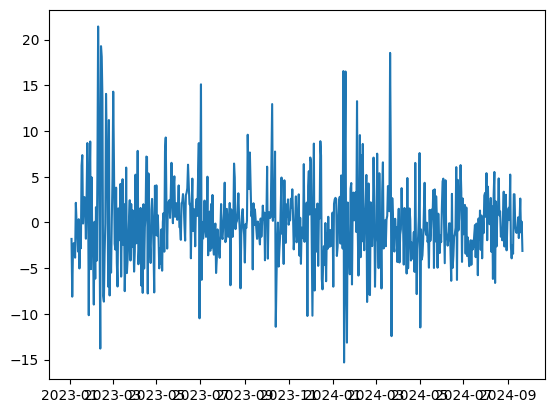

In [226]:
plt.plot(resid["pm10"])

In [223]:
resid

pm10     pm2_5  temperature_2m  relative_humidity_2m  \
day                                                                    
2023-01-03 -1.806210 -2.151813       -1.517367              5.511233   
2023-01-04 -8.119616 -5.215212        2.816680              0.477034   
2023-01-05 -3.210024 -1.159817        1.267428              2.997868   
2023-01-06 -2.270183 -1.820310       -0.844084             -2.075177   
2023-01-07 -2.943562 -1.437233       -1.108152             -2.736024   
...              ...       ...             ...                   ...   
2024-09-17  0.077578 -0.142257        1.208475             -2.056428   
2024-09-18  2.609219  3.129400        3.179073             -3.615935   
2024-09-19 -1.091733  0.134764        1.069910            -13.271244   
2024-09-20  0.079826  1.331471       -2.079856             13.499319   
2024-09-21 -3.119483 -2.946569        2.496359             -0.003621   

            precipitation  surface_pressure  wind_speed_10m  \
day                                                           
2023-01-03      -0.055601          3.803147        4.528977   
2023-01-04       0.024811         -2.951199       10.666456   
2023-01-05      -0.047734          1.747870       -5.811219   
2023-01-06      -0.144173          0.818688        2.159673   
2023-01-07      -0.088546         -7.154929        4.912768   
...                   ...               ...             ...   
2024-09-17      -0.065533          1.477147        7.548232   
2024-09-18      -0.040783         -2.014688        1.622895   
2024-09-19      -0.131205          1.472597        0.214089   
2024-09-20       0.220411          1.500864       -6.309417   
2024-09-21      -0.120765         -0.950620        1.516946   

            soil_temperature_0_to_7cm  soil_moisture_0_to_7cm  
day                                                            
2023-01-03                  -1.990491               -0.018835  
2023-01-04                   1.590601               -0.002816  
2023-01-05                   0.804764               -0.010979  
2023-01-06                  -0.743349               -0.011676  
2023-01-07                  -0.500903               -0.018634  
...                               ...                     ...  
2024-09-17                   0.768363               -0.012012  
2024-09-18                   1.703046               -0.010051  
2024-09-19                   0.504175               -0.011234  
2024-09-20                  -1.211466                0.026821  
2024-09-21                   1.176132               -0.013689  

[628 rows x 9 columns]